# Scrape Blinken Public Affairs Materials

In [1]:
# set up
import requests 
import bs4
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

%xmode Minimal

Exception reporting mode: Minimal


## Page Scraping of Links

In [2]:
# set headers 
my_header_list = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
              'Accept-Language': 'en-US,en;q=0.9'}

### Scrape one page

### Scrape many pages

In [3]:
# define webpage scraping 
def scrape_dos_blinken(website, headers):
    server_response = requests.get(website, headers)
    time.sleep(5)
    soup = bs4.BeautifulSoup(server_response.content, features="html.parser")
    results = soup.find_all('li', class_ = 'collection-result') 
    results_list = [{'title': i.find('a', class_ = 'collection-result__link').text,
                 'source': i.find('span').text,
                 'date': i.find('span', dir= 'ltr').text, 
                 'type_of_release': i.find('p', class_ = 'collection-result__date').text,
                'link': i.find('a', class_ = 'collection-result__link')['href']} for i in results]
    df = pd.DataFrame.from_dict(results_list)
    df['title'] = [i.strip() for i in df.title] # because original output has weird 
    df['content'] = np.nan
    return df

In [5]:
# try to scrape the first set of pages
# manual review for 2022 - I want pages 77 - 179
df_list=[]

for i in range(77,91):
    try: 
        df = scrape_dos_blinken(f'https://www.state.gov/remarks-secretary-blinken/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')

In [6]:
# combined into one (1)
combined = pd.concat(df_list, ignore_index=True)
combined.head()

,title,source,date,type_of_release,link,content,page_scraped
0,The Negev Forum Working Groups and Regional Co...,Antony J. Blinken,"January 10, 2023",Press Statement,https://www.state.gov/the-negev-forum-working-...,NaN,77
1,Secretary Antony J. Blinken Mexican Foreign Se...,Antony J. Blinken,"January 10, 2023",Remarks,https://www.state.gov/secretary-antony-j-blink...,NaN,77
2,Welcome Corps Launch Video,Antony J. Blinken,"January 6, 2023",Video Remarks,https://www.state.gov/welcome-corps-launch-video/,NaN,77
3,More Than $3.75 Billion in U.S. Military Assis...,Antony J. Blinken,"January 6, 2023",Press Statement,https://www.state.gov/more-than-3-75-billion-i...,NaN,77
4,New Sanctions Targeting Iran’s UAV and Ballist...,Antony J. Blinken,"January 6, 2023",Press Statement,https://www.state.gov/new-sanctions-targeting-...,NaN,77


In [7]:
# do the rest
df_list=[]

for i in range(91,180):
    try: 
        df = scrape_dos_blinken(f'https://www.state.gov/remarks-secretary-blinken/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')

Error: 'DataFrame' object has no attribute 'title' at page 110
Error: 'DataFrame' object has no attribute 'title' at page 111
Error: 'DataFrame' object has no attribute 'title' at page 130
Error: 'DataFrame' object has no attribute 'title' at page 149
Error: 'DataFrame' object has no attribute 'title' at page 168


In [8]:
# combined them into one (2)
combined2 = pd.concat(df_list, ignore_index=True)
combined_df=pd.concat([combined, combined2], ignore_index=True)

# check this worked
combined_df.head()
combined_df.info()

,title,source,date,type_of_release,link,content,page_scraped
0,The Negev Forum Working Groups and Regional Co...,Antony J. Blinken,"January 10, 2023",Press Statement,https://www.state.gov/the-negev-forum-working-...,NaN,77
1,Secretary Antony J. Blinken Mexican Foreign Se...,Antony J. Blinken,"January 10, 2023",Remarks,https://www.state.gov/secretary-antony-j-blink...,NaN,77
2,Welcome Corps Launch Video,Antony J. Blinken,"January 6, 2023",Video Remarks,https://www.state.gov/welcome-corps-launch-video/,NaN,77
3,More Than $3.75 Billion in U.S. Military Assis...,Antony J. Blinken,"January 6, 2023",Press Statement,https://www.state.gov/more-than-3-75-billion-i...,NaN,77
4,New Sanctions Targeting Iran’s UAV and Ballist...,Antony J. Blinken,"January 6, 2023",Press Statement,https://www.state.gov/new-sanctions-targeting-...,NaN,77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            980 non-null    object 
 1   source           980 non-null    object 
 2   date             980 non-null    object 
 3   type_of_release  980 non-null    object 
 4   link             980 non-null    object 
 5   content          0 non-null      float64
 6   page_scraped     980 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 53.7+ KB


In [9]:
## safety save in case kernel collapses again
#combined_df.to_csv('blinken_2022_linksonly_backup.csv', index=False)

### Troubleshoot Missed Links

In [ ]:
# errors were raised for 110, 111, 130, 149, 168
# Error: 'DataFrame' object has no attribute 'title' at page 110
# Error: 'DataFrame' object has no attribute 'title' at page 111
# Error: 'DataFrame' object has no attribute 'title' at page 130
# Error: 'DataFrame' object has no attribute 'title' at page 149
# Error: 'DataFrame' object has no attribute 'title' at page 168

In [10]:
df_list_rt=[]

for i in [110,111,130,149,168]:
    try: 
        df = scrape_dos_blinken(f'https://www.state.gov/remarks-secretary-blinken/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list_rt.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')

In [14]:
# looks like it all worked this time 
combined_rt = pd.concat(df_list_rt, ignore_index = True)
combined_df2 = pd.concat([combined_rt, combined_df], ignore_index=True)
combined_df2.head()
combined_df2.info()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Antony J. Blinken And Surinamese Pre...,Antony J. Blinken,"September 15, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,NaN,110
1,"Targeting Russia’s Senior Officials, Defense I...",Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/targeting-senior-russian...,NaN,110
2,Commemorating the International Day of Democracy,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/commemorating-the-intern...,NaN,110
3,Papua New Guinea National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/papua-new-guinea-nationa...,NaN,110
4,El Salvador National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/el-salvador-national-day/,NaN,110


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1030 non-null   object 
 1   source           1030 non-null   object 
 2   date             1030 non-null   object 
 3   type_of_release  1030 non-null   object 
 4   link             1030 non-null   object 
 5   content          0 non-null      float64
 6   page_scraped     1030 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 56.5+ KB


In [15]:
## safety save in case kernel collapses again
#combined_df2.to_csv('blinken_2022_linksonly.csv', index=False)

## Scrape Link Content

### Test One

### Scrape all content

In [16]:
# define link scraping 
def get_link_content_blinken(link, df, header_list):
    try: 
        # check if content has already been pulled
        result = df.loc[df.link == link, 'content'].notnull().all()
        if result:
            return f'content already existing for {link}' 
        else: 
            try: 
                df['content']
                server_response = requests.get(link, headers = header_list)
                time.sleep(5) # to align with dos robots.txt
                soup_link = bs4.BeautifulSoup(server_response.content, features="html.parser")
                result = soup_link.find('div', class_ = 'entry-content').find_all('p')
                string_result = [str(i.text) for i in result]
                string_result_clean = [i.replace(u'\xa0', u' ') for i in string_result]
                result_merged = " ".join(string_result_clean)
                df.loc[df.link == link, 'content'] = result_merged
                return f"success: content added from {link}"
            except: 
                pass
    except Exception as e: 
        return f"unable to gather content from {link} due to {e}"
    #return df_updated 

In [17]:
# test on 10 to see if it works
for i in combined_df2.link[0:10]:
     get_link_content_blinken(i, combined_df2, my_header_list)

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-surinamese-president-chandrikapersad-santokhi-before-their-meeting/'

'success: content added from https://www.state.gov/targeting-senior-russian-officials-defense-industrial-base-financial-infrastructure-leaders-and-human-rights-abusers/'

'success: content added from https://www.state.gov/commemorating-the-international-day-of-democracy-2/'

'success: content added from https://www.state.gov/papua-new-guinea-national-day/'

'success: content added from https://www.state.gov/el-salvador-national-day/'

'success: content added from https://www.state.gov/honduras-national-day/'

'success: content added from https://www.state.gov/costa-rica-national-day/'

'success: content added from https://www.state.gov/nicaragua-national-day/'

'success: content added from https://www.state.gov/guatemala-national-day/'

'success: content added from https://www.state.gov/united-states-announces-additional-humanitarian-assistance-for-the-syrian-people/'

In [18]:
combined_df2.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Antony J. Blinken And Surinamese Pre...,Antony J. Blinken,"September 15, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Well, good morning, everyon...",110
1,"Targeting Russia’s Senior Officials, Defense I...",Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/targeting-senior-russian...,The United States continues to hold the Russia...,110
2,Commemorating the International Day of Democracy,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/commemorating-the-intern...,"This International Day of Democracy, we unders...",110
3,Papua New Guinea National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/papua-new-guinea-nationa...,"On behalf of the United States of America, I e...",110
4,El Salvador National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/el-salvador-national-day/,On behalf of the Government of the United Stat...,110


In [19]:
# do this for all!
for i in combined_df2.link:
     get_link_content_blinken(i, combined_df2, my_header_list)

'content already existing for https://www.state.gov/secretary-antony-j-blinken-and-surinamese-president-chandrikapersad-santokhi-before-their-meeting/'

'content already existing for https://www.state.gov/targeting-senior-russian-officials-defense-industrial-base-financial-infrastructure-leaders-and-human-rights-abusers/'

'content already existing for https://www.state.gov/commemorating-the-international-day-of-democracy-2/'

'content already existing for https://www.state.gov/papua-new-guinea-national-day/'

'content already existing for https://www.state.gov/el-salvador-national-day/'

'content already existing for https://www.state.gov/honduras-national-day/'

'content already existing for https://www.state.gov/costa-rica-national-day/'

'content already existing for https://www.state.gov/nicaragua-national-day/'

'content already existing for https://www.state.gov/guatemala-national-day/'

'content already existing for https://www.state.gov/united-states-announces-additional-humanitarian-assistance-for-the-syrian-people/'

'success: content added from https://www.state.gov/sanctioning-iranians-for-malicious-cyber-acts/'

'success: content added from https://www.state.gov/remarks-at-a-state-department-careers-event-at-purdue-university/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-secretary-of-commerce-gina-m-raimondo-indiana-governor-eric-holcomb-senator-todd-young-and-purdue-university-president-mitch-daniels-in-a-moderated-conversatio/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-press-with-secretary-of-commerce-gina-m-raimondo-indiana-governor-eric-holcomb-senator-todd-young-and-purdue-university-president-mitch-daniels/'

'success: content added from https://www.state.gov/announcement-of-the-u-s-department-of-states-diversity-equity-inclusion-and-accessibility-deia-strategic-plan/'

'success: content added from https://www.state.gov/secretary-of-state-antony-j-blinken-secretary-of-commerce-gina-raimondo-mexican-secretary-of-economy-tatiana-clouthier-and-mexican-secretary-of-foreign-affairs-marcelo-ebrard-at-a-joint-pre/'

'success: content added from https://www.state.gov/calling-for-the-immediate-cessation-of-hostilities-between-armenia-and-azerbaijan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-the-second-annual-high-level-economic-dialogue/'

'success: content added from https://www.state.gov/on-the-occasion-of-the-ethiopian-new-year/'

'success: content added from https://www.state.gov/a-day-of-remembrance/'

'success: content added from https://www.state.gov/richard-nephew-named-as-coordinator-on-global-anti-corruption/'

'success: content added from https://www.state.gov/venezuela-national-day-2/'

'success: content added from https://www.state.gov/algeria-national-day-2/'

'success: content added from https://www.state.gov/cabo-verde-national-day-2/'

'success: content added from https://www.state.gov/belarus-national-day/'

'success: content added from https://www.state.gov/820-million-in-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/reaffirming-our-commitment-to-the-treaty-of-the-non-proliferation-of-nuclear-weapons/'

'success: content added from https://www.state.gov/canada-day-2/'

'success: content added from https://www.state.gov/rwanda-national-day-2/'

'success: content added from https://www.state.gov/the-federal-republic-of-somalias-national-day-2/'

'success: content added from https://www.state.gov/suspension-of-russias-permanent-observer-status-at-the-organization-of-american-states/'

'success: content added from https://www.state.gov/anzac-day-2/'

'success: content added from https://www.state.gov/800-million-in-additional-u-s-security-assistance-for-ukraine-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-homeland-security-secretary-alejandro-mayorkas-panamanian-foreign-minister-erika-mouynes-and-panamanian-public-security-minister-juan-manuel-pino-forero-at-a-joint-pr/'

'success: content added from https://www.state.gov/promoting-accountability-for-human-rights-abuses-in-russia-and-belarus-and-taking-action-against-sanctions-evaders/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-panamanian-president-laurentino-cortizo-cohen-and-panamanian-foreign-minister-erika-mouynes-at-the-ministerial-conference-on-migration-and-protection-session-on-stabil/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-of-homeland-security-alejandro-mayorkas-opening-remarks-at-the-ministerial-conference-on-migration-and-protection-reception/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-transparency-international-panama-chapter-executive-director-olga-de-obaldia-opening-remarks-at-meeting-with-anticorruption-and-transparency-advocates/'

'success: content added from https://www.state.gov/the-united-states-and-panama-advance-migration-cooperation/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moldovan-foreign-minister-nicu-popescu-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-at-a-joint-press-availability-2/'

'success: content added from https://www.state.gov/japan-national-day/'

'success: content added from https://www.state.gov/brunei-national-day-2/'

'success: content added from https://www.state.gov/saint-lucia-independence-day-2/'

'success: content added from https://www.state.gov/department-of-state-presence-in-ukraine/'

'success: content added from https://www.state.gov/kremlin-decision-on-eastern-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-cbs-face-the-nation-with-margaret-brennan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-nbc-meet-the-press-with-chuck-todd/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-state-of-the-union-on-cnn-with-dana-bash/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-ekaterina-kotrikadze-of-dozhd-tv/'

'success: content added from https://www.state.gov/the-negev-forum-working-groups-and-regional-cooperation-framework/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-mexican-foreign-secretary-marcelo-ebrard-and-canadian-foreign-minister-melanie-joly-at-the-signing-of-a-north-american-declaration-on-partnership-for-equity-and-racial-just/'

'success: content added from https://www.state.gov/welcome-corps-launch-video/'

'success: content added from https://www.state.gov/more-than-3-75-billion-in-u-s-military-assistance-to-ukraine-and-countries-impacted-by-russias-brutal-war/'

'success: content added from https://www.state.gov/new-sanctions-targeting-irans-uav-and-ballistic-missile-industries/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-launch-of-the-u-s-strategy-on-global-womens-economic-security/'

'success: content added from https://www.state.gov/independence-day-of-burma/'

'success: content added from https://www.state.gov/sudan-national-day/'

'success: content added from https://www.state.gov/launch-of-the-au-monitoring-verification-and-compliance-mission-in-ethiopia/'

'success: content added from https://www.state.gov/israels-new-government/'

'success: content added from https://www.state.gov/four-year-anniversary-of-paul-whelans-wrongful-detention-in-russia/'

'success: content added from https://www.state.gov/results-of-nepals-federal-elections/'

'success: content added from https://www.state.gov/address-to-ukrainian-diplomats/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-27/'

'success: content added from https://www.state.gov/the-united-states-imposes-sanctions-on-russian-naval-entities-2/'

'success: content added from https://www.state.gov/un-security-council-adopts-resolution-on-burma/'

'success: content added from https://www.state.gov/loss-of-life-in-the-sinking-of-htms-sukhothai/'

'success: content added from https://www.state.gov/sanctioning-iranian-officials-connected-to-serious-human-rights-abuses/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-panamanian-foreign-minister-janaina-tewaney-before-their-meeting/'

'success: content added from https://www.state.gov/1-85-billion-in-additional-u-s-military-assistance-including-the-first-transfer-of-patriot-air-defense-system/'

'success: content added from https://www.state.gov/standing-with-afghanistans-women-and-girls/'

'success: content added from https://www.state.gov/improving-humanitarian-aid-delivery-by-expanding-authorizations-across-u-s-sanctions/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-maltese-foreign-minister-ian-borg-before-their-meeting/'

'success: content added from https://www.state.gov/announcement-of-joe-kennedy-iii-as-u-s-special-envoy-to-northern-ireland-for-economic-affairs/'

'success: content added from https://www.state.gov/qatar-national-day-2/'

'success: content added from https://www.state.gov/niger-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-mexican-foreign-secretary-marcelo-ebrard-before-their-meeting-3/'

'success: content added from https://www.state.gov/appointment-of-james-p-rubin-as-special-envoy-and-coordinator-of-the-global-engagement-center/'

'success: content added from https://www.state.gov/welcoming-japans-new-national-security-strategy-national-defense-strategy-and-defense-buildup-program/'

'success: content added from https://www.state.gov/bahrain-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-26/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-kenyan-president-ruto-before-their-meeting/'

'success: content added from https://www.state.gov/continuing-to-hold-russia-to-account-for-its-war-against-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-u-s-africa-leaders-summit-foreign-ministers-dinner/'

'success: content added from https://www.state.gov/secretary-blinken-and-mozambican-president-filipe-nyusi-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-u-s-africa-business-forum-lunch/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ghanaian-president-nana-akufo-addo-before-their-meeting/'

'success: content added from https://www.state.gov/removal-of-iran-from-the-un-commission-on-the-status-of-women/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-tunisian-president-kais-saied-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-beninese-president-patrice-talon-and-nigerien-president-mohamed-bazoum-at-the-regional-compact-signing/'

'success: content added from https://www.state.gov/secretary-blinken-and-democratic-republic-of-the-congo-president-felix-tshisekedi-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-blinken-and-senegalese-president-and-au-chairperson-macky-sall-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-blinken-and-ethiopian-prime-minister-abiy-ahmed-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-blinken-at-the-conservation-climate-adaptation-and-just-energy-transition-forum/'

'success: content added from https://www.state.gov/secretary-blinken-at-an-mou-signing-with-democratic-republic-of-the-congo-vice-prime-minister-and-foreign-minister-christophe-lutundula-and-zambian-foreign-minister-stanley-kakubo/'

'success: content added from https://www.state.gov/secretary-blinken-at-the-peace-security-and-governance-forum/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-of-defense-lloyd-austin-and-angolan-president-joao-lourenco-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-of-defense-lloyd-austin-before-meeting-with-djiboutian-president-ismail-omar-guelleh-nigerien-president-mohamed-bazoum-and-somali-president-hassan-sheikh-mo/'

'success: content added from https://www.state.gov/plans-for-a-bureau-of-global-health-security-and-diplomacy/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-reception-for-african-innovators-as-part-of-the-u-s-africa-leaders-summit/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-signing-ceremony-for-a-new-memorandum-of-understanding-mou-with-the-tent-partnership-for-refugees/'

'success: content added from https://www.state.gov/200th-anniversary-of-u-s-mexico-bilateral-relations/'

'success: content added from https://www.state.gov/alleged-pan-am-flight-103-bombmaker-in-u-s-custody/'

'success: content added from https://www.state.gov/secretary-blinken-and-uzbekistan-foreign-minister-vladimir-norov-before-their-meeting/'

'success: content added from https://www.state.gov/kenya-national-day-2/'

'success: content added from https://www.state.gov/burkina-faso-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-conversation-with-2022-department-of-state-anti-corruption-champion-award-honorees/'

'success: content added from https://www.state.gov/human-rights-day/'

'success: content added from https://www.state.gov/un-security-council-adopts-resolution-establishing-humanitarian-carveout-across-un-sanctions-regimes/'

'success: content added from https://www.state.gov/the-united-states-imposes-sanctions-on-russian-entities-involved-in-uav-deal-with-iran/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-polish-foreign-minister-zbigniew-rau-before-their-meeting-2/'

'success: content added from https://www.state.gov/275-million-in-additional-u-s-military-assistance-for-ukraine-2/'

'success: content added from https://www.state.gov/combatting-global-corruption-and-human-rights-abuses/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-anti-corruption-champions-award-ceremony/'

'success: content added from https://www.state.gov/a-day-of-remembrance-and-call-to-action/'

'success: content added from https://www.state.gov/departure-of-deputy-secretary-of-state-for-management-and-resources-brian-p-mckeon/'

'success: content added from https://www.state.gov/remarks-for-launch-of-the-2022-u-s-strategy-on-gender-based-violence-globally/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-cbs-news-livestream-with-margaret-brennan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-swedish-foreign-minister-tobias-billstrom-and-finnish-foreign-minister-pekka-haavisto-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/the-release-of-brittney-griner-from-russia/'

'success: content added from https://www.state.gov/expanded-visa-restriction-policy-for-individuals-undermining-the-democratic-transition-in-sudan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-defense-secretary-lloyd-austin-australian-foreign-minister-penny-wong-and-australian-deputy-prime-minister-and-minister-for-defense-richard-marles-at-a-joint-press-avail/'

'success: content added from https://www.state.gov/finland-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-editor-in-chief-matt-murray-at-the-wall-street-journal-ceo-council-summit/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-u-s-eu-trade-and-technology-council-ministerial-co-chairs-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-stakeholders-roundtable/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-jake-tapper-of-cnn-state-of-the-union-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-j-street-national-conference/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-margaret-brennan-of-cbss-face-the-nation/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-kennedy-center-honors-dinner/'

'success: content added from https://www.state.gov/the-international-day-of-persons-with-disabilities'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-sri-lankan-foreign-minister-ali-sabry-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-business-council-for-international-understanding-world-aids-day-commemoration/'

'success: content added from https://www.state.gov/religious-freedom-designations-2/'

'success: content added from https://www.state.gov/uae-national-day-2/'

'success: content added from https://www.state.gov/thailand-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-thomas-sotto-of-france-2/'

'success: content added from https://www.state.gov/34th-commemoration-of-world-aids-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-state-luncheon-in-honor-of-french-president-emmanuel-macron/'

'success: content added from https://www.state.gov/terrorist-designation-of-aqis-and-ttp-leaders/'

'success: content added from https://www.state.gov/designating-three-democratic-peoples-republic-of-korea-officials-in-response-to-pyongyangs-november-icbm-launches/'

'success: content added from https://www.state.gov/laos-national-day-2/'

'success: content added from https://www.state.gov/appointment-of-abby-finkenauer-as-special-envoy-for-global-youth-issues/'

'success: content added from https://www.state.gov/central-african-republic-national-day-2/'

'success: content added from https://www.state.gov/romanias-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-christiane-amanpour-of-cnn/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-andrea-mitchell-of-nbc-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-romania/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-before-their-meeting-5/'

'success: content added from https://www.state.gov/barbados-national-day/'

'content already existing for https://www.state.gov/barbados-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-belgian-foreign-minister-hadja-lahbib-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-romanian-foreign-minister-bogdan-aurescu-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-slovak-foreign-minister-rastislav-kacer-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nato-secretary-general-jens-stoltenberg-before-their-meeting-6/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-romanian-president-klaus-iohannis-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-romanian-prime-minister-nicolae-ciuca-at-the-romanian-athenaeum/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-saranee-sanguanruang-of-lda-world-on-youtube/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-arieh-smith-of-xiaomanyc-on-youtube/'

'success: content added from https://www.state.gov/mauritania-national-day/'

'success: content added from https://www.state.gov/suriname-national-day/'

'success: content added from https://www.state.gov/the-international-day-for-the-elimination-of-violence-against-women-and-16-days-of-activism-against-gender-based-violence/'

'success: content added from https://www.state.gov/bosnia-and-herzegovina-statehood-day-2/'

'success: content added from https://www.state.gov/malaysias-national-elections/'

'success: content added from https://www.state.gov/the-united-nations-human-rights-council-holds-special-session-on-iran/'

'success: content added from https://www.state.gov/terrorist-attacks-in-jerusalem/'

'success: content added from https://www.state.gov/designating-iranian-officials-connected-to-serious-human-rights-abuses-in-irans-kurdistan-and-west-azerbaijan-provinces/'

'success: content added from https://www.state.gov/400-million-in-additional-u-s-military-assistance-for-ukraine-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-qatari-deputy-prime-minister-and-foreign-minister-mohammed-bin-abdulrahman-al-thani-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-press-4/'

'success: content added from https://www.state.gov/lebanon-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-sports-diplomacy-event/'

'success: content added from https://www.state.gov/transgender-day-of-remembrance/'

'success: content added from https://www.state.gov/monacos-national-day/'

'success: content added from https://www.state.gov/oman-national-day-2/'

'success: content added from https://www.state.gov/latvia-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-aticharn-cherngchavano-of-spin9-on-youtube/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-united-states-trade-representative-katherine-tai-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/verdict-in-dutch-trial-against-mh17-suspects/'

'success: content added from https://www.state.gov/designating-sanctions-evaders-involved-in-iranian-petrochemical-and-petroleum-trade/'

'content already existing for https://www.state.gov/designating-sanctions-evaders-involved-in-iranian-petrochemical-and-petroleum-trade/'

'success: content added from https://www.state.gov/release-of-u-s-citizen-kyaw-htay-oo/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-thai-deputy-prime-minister-and-foreign-minister-don-pramudwinai-before-their-meeting-4/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-handover-of-the-apec-ministerial-meeting-to-the-united-states/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-vietnamese-foreign-minister-bui-thanh-son-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-papua-new-guinea-prime-minister-james-marape-before-their-meeting/'

'success: content added from https://www.state.gov/sanctioning-senior-officials-of-iranian-broadcaster/'

'success: content added from https://www.state.gov/artemis-i-advances-international-cooperation-inspires-next-generation/'

'success: content added from https://www.state.gov/imposing-sanctions-on-entities-and-individuals-in-response-to-irans-transfer-of-military-uavs-to-russia/'

'success: content added from https://www.state.gov/targeting-russias-global-military-procurement-network-and-kremlin-linked-networks/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-before-their-meeting-4/'

'success: content added from https://www.state.gov/demonstrating-the-u-s-commitment-to-climate-action-at-cop27/'

'success: content added from https://www.state.gov/sint-maarten-national-day/'

'success: content added from https://www.state.gov/angolan-national-day/'

'success: content added from https://www.state.gov/400-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/direct-flights-between-tel-aviv-and-doha-for-the-world-cup/'

'success: content added from https://www.state.gov/russias-continued-wrongful-detention-of-brittney-griner/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-omani-foreign-minister-sayyid-badr-al-busaidi-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-bahamian-foreign-minister-frederick-mitchell-before-their-meeting/'

'success: content added from https://www.state.gov/designation-of-the-burmese-regimes-military-aircraft-suppliers/'

'success: content added from https://www.state.gov/cambodia-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-armenian-foreign-minister-ararat-mirzoyan-and-azerbaijani-foreign-minister-jeyhun-bayramov-before-their-meeting/'

'success: content added from https://www.state.gov/the-second-anniversary-of-the-2020-elections-in-burma/'

'success: content added from https://www.state.gov/u-s-department-of-state-announces-reward-offers-for-information-leading-to-the-arrests-and-or-convictions-of-three-haitian-gang-leaders/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-25/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-italian-foreign-minister-antonio-tajani-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-kenyan-foreign-minister-dr-alfred-nganga-mutua-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-japanese-foreign-minister-yoshimasa-hayashi-before-their-meeting-4/'

'success: content added from https://www.state.gov/designation-of-haitian-senate-president-joseph-lambert-for-involvement-in-significant-corruption-and-a-gross-violation-of-human-rights/'

'success: content added from https://www.state.gov/terezin-declaration-conference/'

'success: content added from https://www.state.gov/shooting-of-former-pakistani-prime-minister-imran-khan/'

'success: content added from https://www.state.gov/designation-of-sanctions-evasion-network/'

'success: content added from https://www.state.gov/remarks-at-a-u-s-german-futures-forum-moderated-discussion-with-german-foreign-minister-annalena-baerbock/'

'success: content added from https://www.state.gov/tonga-national-day-2/'

'success: content added from https://www.state.gov/panama-national-day/'

'success: content added from https://www.state.gov/dominica-national-day/'

'success: content added from https://www.state.gov/on-the-african-union-led-peace-talks/'

'success: content added from https://www.state.gov/polands-announcement-on-westinghouse-nuclear-technology-selection/'

'success: content added from https://www.state.gov/federated-states-of-micronesia-independence-day-2/'

'success: content added from https://www.state.gov/u-s-uae-signing-of-the-partnership-for-accelerating-clean-energy/'

'success: content added from https://www.state.gov/antigua-and-barbuda-national-day/'

'success: content added from https://www.state.gov/suspension-of-the-black-sea-grain-initiative/'

'success: content added from https://www.state.gov/turkish-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-foreign-minister-melanie-joly-at-a-conversation-with-rising-leaders/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-icao-president-salvatore-sciacchitano-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-foreign-minister-melanie-joly-at-a-tour-of-lithion-recycling/'

'success: content added from https://www.state.gov/275-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-gino-chouinard-and-georges-pothier-of-salut-bonjour/'

'success: content added from https://www.state.gov/czech-republics-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-prime-minister-justin-trudeau-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-vassy-kapelos-of-canadian-broadcasting-corporation-cbc-power-and-politics/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-foreign-minister-melanie-joly-at-a-joint-press-availability-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-african-union-commission-chairperson-moussa-faki-mahamat-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-foreign-minister-melanie-joly-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-canadian-deputy-prime-minister-chrystia-freeland-and-canadian-foreign-minister-melanie-joly/'

'success: content added from https://www.state.gov/international-religious-freedom-day-2/'

'success: content added from https://www.state.gov/historic-agreement-establishing-a-permanent-israel-lebanon-maritime-boundary/'

'success: content added from https://www.state.gov/saint-vincent-and-the-grenadines-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-a-diwali-reception/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-peggy-collins-of-bloomberg-news/'

'success: content added from https://www.state.gov/designation-of-iranian-officials-and-entities-connected-to-ongoing-protest-repression-censorship-and-prison-abuses/'

'success: content added from https://www.state.gov/response-to-corruption-and-election-interference-in-moldova/'

'success: content added from https://www.state.gov/austrias-national-day/'

'success: content added from https://www.state.gov/on-the-start-of-northern-ethiopia-peace-talks/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-israeli-president-isaac-herzog-before-their-meeting-2/'

'success: content added from https://www.state.gov/kazakhstans-republic-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-luncheon-commemorating-the-10th-anniversary-of-techwomen/'

'success: content added from https://www.state.gov/one-year-anniversary-of-military-takeover-in-sudan/'

'success: content added from https://www.state.gov/designation-of-three-syrian-military-officials-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://www.state.gov/expanding-u-s-sanctions-authorities-and-announcement-of-visa-restrictions-for-nicaraguan-officials/'

'success: content added from https://www.state.gov/zambia-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-french-foreign-minister-catherine-colonna-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/welcoming-the-announcement-of-au-led-negotiations-to-resolve-conflict-in-ethiopia/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-brian-taff-of-wpvi-tv/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-good-morning-america-with-george-stephanopoulos/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-opening-of-a-new-philadelphia-passport-agency-and-at-a-u-s-citizenship-and-immigration-services-naturalization-ceremony/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-unveiling-of-a-mural-dedicated-to-former-congressman-robert-n-c-nix-sr/'

'success: content added from https://www.state.gov/imposing-sanctions-on-russias-technology-procurement/'

'success: content added from https://www.state.gov/release-of-the-presidents-national-biodefense-strategy/'

'success: content added from https://www.state.gov/one-year-of-detention-for-our-locally-employed-staff-in-sanaa/'

'success: content added from https://www.state.gov/secretary-antony-blinken-remarks-to-the-press-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-conversation-on-the-evolution-and-importance-of-technology-diplomacy-and-national-security-with-66th-secretary-of-state-condoleezza-rice/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-university-recruitment-event/'

'success: content added from https://www.state.gov/remarks-at-slac-national-accelerator-laboratory/'

'success: content added from https://www.state.gov/terrorist-designation-of-al-shabaab-leaders/'

'success: content added from https://www.state.gov/world-food-day/'

'success: content added from https://www.state.gov/725-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/intensifying-military-operations-in-northern-ethiopia/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-meeting-with-civil-society-activists-on-womens-rights-and-human-rights-in-iran/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-signing-ceremony-for-a-new-memorandum-of-understanding-mou-with-the-hispanic-association-of-colleges-and-universities-hacu/'

'success: content added from https://www.state.gov/remarks-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/remarks-at-the-u-s-mexico-high-level-security-dialogue/'

'success: content added from https://www.state.gov/the-united-states-announces-60-million-in-rapid-assistance-to-support-vulnerable-tunisian-families/'

'success: content added from https://www.state.gov/un-general-assembly-resolution-condemning-russias-attempted-annexation-of-ukraines-territory/'

'success: content added from https://www.state.gov/release-of-the-presidents-national-security-strategy/'

'success: content added from https://www.state.gov/steps-to-address-the-humanitarian-and-security-situation-in-haiti/'

'success: content added from https://www.state.gov/equatorial-guinea-national-day-2/'

'success: content added from https://www.state.gov/spain-national-day-2/'

'success: content added from https://www.state.gov/historic-breakthrough-on-the-israel-lebanon-maritime-boundary/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-norwegian-foreign-minister-anniken-huitfeldt-before-their-meeting-2/'

'success: content added from https://www.state.gov/announcement-of-visa-restrictions-in-response-to-the-repression-of-women-and-girls-in-afghanistan/'

'success: content added from https://www.state.gov/observance-of-the-international-day-of-the-girl-child-on-its-10th-anniversary/'

'success: content added from https://www.state.gov/u-s-support-for-ukraine-in-the-face-of-russian-strikes/'

'success: content added from https://www.state.gov/curacao-national-day/'

'success: content added from https://www.state.gov/ugandan-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-press-15/'

'success: content added from https://www.state.gov/fiji-national-day-2/'

'success: content added from https://www.state.gov/designating-dprk-related-sanctions-evaders/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-peruvian-foreign-minister-cesar-landa-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-the-meeting-with-cuban-venezuelan-and-nicaraguan-human-rights-defenders/'

'success: content added from https://www.state.gov/remarks-before-the-canada-hosted-meeting-on-haiti/'

'success: content added from https://www.state.gov/mass-shooting-in-thailand/'

'success: content added from https://www.state.gov/designations-of-burmese-targets-to-promote-justice-and-accountability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-oas-general-assembly-first-plenary-session/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-peruvian-foreign-minister-cesar-landa-at-the-migration-ministerial-opening-session/'

'success: content added from https://www.state.gov/sanctioning-iranian-leaders-responsible-for-human-rights-abuses-or-censorship/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-organization-of-the-american-states-secretary-general-luis-almagro-at-the-ministerial-meeting-of-the-summit-implementation-review-group-sirg/'

'success: content added from https://www.state.gov/on-baquer-namazis-departure-from-iran/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-tour-of-the-coordinador-electrico-nacional/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-chilean-foreign-minister-antonia-urrejola-at-a-joint-press-availability'

'success: content added from https://www.state.gov/celebrating-hispanic-heritage-month/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-migrant-integration-center/'

'success: content added from https://www.state.gov/lesotho-national-day-2/'

'success: content added from https://www.state.gov/625-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-colombian-president-gustavo-petro-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-colombian-vice-president-francia-marquez-at-a-signing-ceremony-to-support-the-comprehensive-implementation-of-the-ethnic-chapter-of-the-2016-peace-accord/'

'success: content added from https://www.state.gov/iraq-national-day/'

'success: content added from https://www.state.gov/designation-of-two-individuals-and-one-entity-in-bosnia-and-herzegovina/'

'success: content added from https://www.state.gov/amy-popes-nomination-for-director-general-of-the-international-organization-for-migration/'

'success: content added from https://www.state.gov/naming-ambassador-nina-hachigian-as-special-representative-for-subnational-diplomacy/'

'success: content added from https://www.state.gov/day-of-german-unity-2/'

'success: content added from https://www.state.gov/guinea-national-day-2/'

'success: content added from https://www.state.gov/the-release-of-u-s-nationals-from-venezuela/'

'success: content added from https://www.state.gov/nigerias-national-day/'

'success: content added from https://www.state.gov/republic-of-cyprus-independence-day/'

'success: content added from https://www.state.gov/palau-national-day-2/'

'success: content added from https://www.state.gov/tuvalu-national-day-2/'

'success: content added from https://www.state.gov/the-peoples-republic-of-china-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-canadian-foreign-minister-melanie-joly-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/on-national-disability-employment-awareness-month/'

'success: content added from https://www.state.gov/imposing-swift-and-severe-costs-in-response-to-russias-violations-of-ukraines-sovereignty/'

'success: content added from https://www.state.gov/botswana-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-president-of-the-republic-of-the-marshall-islands-david-kabua-president-of-the-federated-states-of-micronesia-david-panuelo-and-president-of-palau-surangel-whipps-jr/'

'success: content added from https://www.state.gov/russias-sham-referenda-in-ukraine/'

'success: content added from https://www.state.gov/designating-iran-petroleum-and-petrochemical-sanctions-evaders/'

'success: content added from https://www.state.gov/the-election-of-doreen-bogdan-martin-as-secretary-general-of-the-international-telecommunication-union/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-u-s-pacific-island-country-leaders-working-lunch-on-people-centered-development-in-the-pacific/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-millennium-challenge-corporation-mou-signing-with-malawian-president-lazarus-chakwera-malawian-finance-and-economic-affairs-minister-sosten-gwengwe-and-mcc-ceo-ali/'

'success: content added from https://www.state.gov/the-presidential-determination-on-refugee-admissions-for-fiscal-year-2023/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-tajikistan-foreign-minister-sirojiddin-muhriddin-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indian-external-affairs-minister-dr-subrahmanyam-jaishankar-at-a-joint-press-availability-2/'

'success: content added from https://www.state.gov/opening-of-the-trial-of-former-seleka-commander-for-atrocity-crimes-in-the-central-african-republic/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-pakistani-foreign-minister-bilawal-bhutto-zardari-to-commemorate-the-75th-anniversary-of-u-s-pakistan-relations/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-pakistani-foreign-minister-bilawal-bhutto-zardari-before-their-meeting/'

'success: content added from https://www.state.gov/turkmenistan-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-belizean-prime-minister-john-briceno-before-their-meeting/'

'success: content added from https://www.state.gov/457-5-million-in-new-u-s-civilian-security-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-interview-with-60-minutes-on-cbs-with-scott-pelley/'

'success: content added from https://www.state.gov/guinea-bissau-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-australian-foreign-minister-penny-wong-indian-external-affairs-minister-dr-subrahmanyam-jaishankar-and-japanese-foreign-minister-hayashi-yoshimasa-before-their-meet/'

'success: content added from https://www.state.gov/united-states-announces-humanitarian-assistance-for-afghanistan/'

'success: content added from https://www.state.gov/secretary-blinken-with-foreign-ministers-of-the-gulf-cooperation-council-nations-egypt-iraq-jordan-and-yemen/'

'success: content added from https://www.state.gov/advancing-the-free-flow-of-information-for-the-iranian-people/'

'success: content added from https://www.state.gov/saudi-arabias-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-ministerial-meeting-of-the-partners-in-the-blue-pacific/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-ministerial-meeting-of-the-minerals-security-partnership/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-japanese-foreign-minister-yoshimasa-hayashi-and-republic-of-korea-foreign-minister-park-jin-before-their-meeting/'

'success: content added from https://www.state.gov/united-states-announces-more-than-170-million-in-humanitarian-assistance-for-the-rakhine-state-rohingya-refugee-crisis/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-united-nations-security-council-ministerial-meeting-on-ukrainian-sovereignty-and-russian-accountability/'

'success: content added from https://www.state.gov/humanitarian-assistance-to-respond-to-the-venezuela-regional-crisis/'

'success: content added from https://www.state.gov/designating-irans-morality-police-and-seven-officials-for-human-rights-abuses-in-iran/'

'success: content added from https://www.state.gov/mali-national-day-2/'

'success: content added from https://www.state.gov/the-kremlins-troop-mobilization/'

'success: content added from https://www.state.gov/welcoming-prisoner-exchanges-in-ukraine/'

'success: content added from https://www.state.gov/humanitarian-assistance-for-mexico-and-central-america/'

'success: content added from https://www.state.gov/belize-independence-day-2/'

'success: content added from https://www.state.gov/malta-national-day-2/'

'success: content added from https://www.state.gov/armenian-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-lebanese-caretaker-prime-minister-najib-mikati-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-global-food-security-summit/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-usaid-democracy-delivers-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-ministerial-meeting-of-the-alliance-for-development-in-democracy/'

'success: content added from https://www.state.gov/secretary-blinken-at-the-launch-of-the-alliance-for-afghan-womens-economic-resilience/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-turkish-foreign-minister-mevlut-cavusoglu-before-their-meeting-4/'

'success: content added from https://www.state.gov/secretary-blinken-and-egyptian-foreign-minister-sameh-shoukry-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-blinken-with-armenian-foreign-minister-ararat-mirzoyan-and-azerbaijani-foreign-minister-jeyhun-bayramov-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nigerien-president-mohamed-bazoum-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-united-nations-lgbti-core-group-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-freedom-of-expression-roundtable/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-yemeni-chairman-of-the-presidential-leadership-council-rashad-al-alimi-before-their-meeting/'

'success: content added from https://www.state.gov/saint-kitts-and-nevis-national-day/'

'success: content added from https://www.state.gov/welcoming-the-release-of-mark-frerichs/'

'success: content added from https://www.state.gov/nepali-constitution-day-2/'

'success: content added from https://www.state.gov/chile-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-jordanian-foreign-minister-ayman-safadi-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/mexican-national-day-2/'

'success: content added from https://www.state.gov/600-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-portuguese-foreign-minister-joao-gomes-cravinho-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-south-african-foreign-minister-naledi-pandor-before-their-meeting/'

'success: content added from https://www.state.gov/second-anniversary-of-the-signing-of-the-abraham-accords/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nato-secretary-general-jens-stoltenberg-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/angola-presidential-elections/'

'success: content added from https://www.state.gov/sanctioning-irans-ministry-of-intelligence-and-security-for-malign-cyber-activities/'

'success: content added from https://www.state.gov/remarks-to-traveling-press-before-departing-poland/'

'success: content added from https://www.state.gov/designating-iranian-proliferators-of-shipping-unmanned-aerial-vehicle-technology-to-russia-for-use-in-ukraine/'

'success: content added from https://www.state.gov/message-to-the-people-of-the-united-kingdom-and-to-the-peoples-of-the-commonwealth/'

'success: content added from https://www.state.gov/tajikistan-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-meeting-with-ukrainian-president-volodymyr-zelenskyy/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-traveling-press/'

'success: content added from https://www.state.gov/republic-of-korea-chuseok-holiday/'

'success: content added from https://www.state.gov/2-8-billion-in-additional-u-s-military-assistance-for-ukraine-and-its-neighbors/'

'success: content added from https://www.state.gov/north-macedonia-national-day-2/'

'success: content added from https://www.state.gov/andorras-national-day-2/'

'success: content added from https://www.state.gov/brazil-national-day/'

'success: content added from https://www.state.gov/eswatini-national-day/'

'success: content added from https://www.state.gov/supreme-court-ruling-on-elections-in-kenya/'

'success: content added from https://www.state.gov/the-appointment-of-mr-abdoulaye-bathily-as-special-representative-of-the-un-secretary-general-for-libya/'

'success: content added from https://www.state.gov/san-marino-national-day-2/'

'success: content added from https://www.state.gov/un-office-of-the-high-commissioner-for-human-rights-report-on-the-human-rights-situation-in-xinjiang/'

'success: content added from https://www.state.gov/vietnam-national-day-2/'

'success: content added from https://www.state.gov/slovakias-national-day/'

'success: content added from https://www.state.gov/uzbekistan-independence-day-2/'

'success: content added from https://www.state.gov/statement-on-the-passing-of-president-mikhail-gorbachev/'

'success: content added from https://www.state.gov/trinidad-and-tobago-national-day/'

'success: content added from https://www.state.gov/kyrgyz-republic-independence-day/'

'success: content added from https://www.state.gov/arrival-of-wheat-carrying-brave-commander-to-east-africa-from-ukraine/'

'success: content added from https://www.state.gov/malaysia-national-day-2/'

'success: content added from https://www.state.gov/international-day-of-the-victims-of-enforced-disappearances-2/'

'success: content added from https://www.state.gov/moldovas-independence-day/'

'success: content added from https://www.state.gov/remembering-the-loss-of-13-american-heroes/'

'success: content added from https://www.state.gov/uruguay-national-day/'

'success: content added from https://www.state.gov/marking-five-years-since-the-genocide-in-burma/'

'success: content added from https://www.state.gov/new-senior-advisor-for-caucasus-negotiations/'

'success: content added from https://www.state.gov/five-months-of-a-humanitarian-truce-in-ethiopia/'

'success: content added from https://www.state.gov/ukraines-independence-day/'

'success: content added from https://www.state.gov/the-nomination-of-professor-sarah-cleveland-for-the-international-court-of-justice/'

'success: content added from https://www.state.gov/standing-against-religious-persecution/'

'success: content added from https://www.state.gov/775-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/on-the-occasion-of-world-humanitarian-day-2/'

'success: content added from https://www.state.gov/hungarys-national-day/'

'success: content added from https://www.state.gov/the-gabonese-republic-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-an-event-in-honor-of-the-anniversaries-of-the-thomas-r-pickering-foreign-affairs-fellowship-charles-b-rangel-international-affairs-program-donald-m-payne-internatio/'

'success: content added from https://www.state.gov/additional-u-s-contribution-to-the-world-food-programme/'

'success: content added from https://www.state.gov/indonesia-independence-day/'

'success: content added from https://www.state.gov/to-african-diaspora-youth-and-exchange-alumni/'

'success: content added from https://www.state.gov/republic-of-korea-national-day/'

'success: content added from https://www.state.gov/republic-of-the-congo-national-day-2/'

'success: content added from https://www.state.gov/liechtensteins-national-day/'

'success: content added from https://www.state.gov/the-attack-against-salman-rushdie/'

'success: content added from https://www.state.gov/indian-independence-day-2/'

'success: content added from https://www.state.gov/pakistan-independence-day-2/'

'success: content added from https://www.state.gov/designation-of-paraguayan-vice-president-hugo-velazquez-and-yacyreta-bi-national-entity-legal-counsel-juan-carlos-duarte-for-involvement-in-significant-corruption/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-rwandan-foreign-minister-vincent-biruta-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-following-his-meeting-with-civil-society-representatives-from-rwanda/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-kigali-genocide-memorial/'

'success: content added from https://www.state.gov/chad-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-press-at-an-election-transparency-hackathon-event/'

'success: content added from https://www.state.gov/tenth-anniversary-of-the-captivity-of-austin-tice/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-democratic-republic-of-congo-prime-minister-jean-michel-sama-lukonde-before-their-meeting/'

'success: content added from https://www.state.gov/ecuadors-independence-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-meeting-with-civil-society-representatives-from-eastern-democratic-republic-of-congo/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-democratic-republic-of-congo-vice-prime-minister-and-foreign-minister-christophe-lutundula-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/remarks-at-a-jazz-cultural-event/'

'success: content added from https://www.state.gov/the-passage-of-the-chips-and-science-act-of-2022/'

'success: content added from https://www.state.gov/signing-of-u-s-instruments-of-ratification-of-finland-and-swedens-nato-accession-protocols/'

'success: content added from https://www.state.gov/promoting-accountability-on-the-second-anniversary-of-the-fraudulent-election-in-belarus/'

'success: content added from https://www.state.gov/remarks-at-a-south-african-womens-day-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-romain-chanson-of-radio-france-internationale-rfi/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-south-african-minister-of-international-relations-and-cooperation-naledi-pandor-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/vital-partners-shared-priorities-the-biden-administrations-sub-saharan-africa-strategy/'

'success: content added from https://www.state.gov/remarks-at-the-opening-of-the-u-s-south-african-strategic-dialogue/'

'success: content added from https://www.state.gov/1-billion-in-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/imposing-sanctions-on-virtual-currency-mixer-tornado-cash/'

'success: content added from https://www.state.gov/singapore-national-day/'

'success: content added from https://www.state.gov/welcoming-the-ceasefire-agreement-in-gaza-and-israel/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-thulasizwe-simelane-of-enca/'

'success: content added from https://www.state.gov/anniversary-of-the-russian-invasion-of-georgia/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-press-3/'

'success: content added from https://www.state.gov/24th-anniversary-of-the-1998-embassy-bombings/'

'success: content added from https://www.state.gov/cote-divoires-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-karen-davila-of-abs-cbn/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-u-s-trade-and-development-agency-offshore-wind-grant-signing/'

'success: content added from https://www.state.gov/jamaicas-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-covid-19-assistance-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-philippine-secretary-of-foreign-affairs-enrique-manalo-at-a-virtual-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-philippine-president-ferdinand-romualdez-marcos-jr-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-philippine-secretary-of-foreign-affairs-enrique-manalo-before-their-virtual-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-narin-sun-of-voice-of-america-khmer/'

'success: content added from https://www.state.gov/bolivias-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-24/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-republic-of-korea-foreign-minister-park-jin-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-cambodian-prime-minister-hun-sen-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indonesian-foreign-minister-retno-marsudi-before-the-asean-u-s-ministerial-meeting/'

'success: content added from https://www.state.gov/conviction-and-sentencing-of-u-s-citizen-brittney-griner-in-russia/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-sri-lankan-foreign-minister-ali-sabry-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-qatari-foreign-minister-mohammed-bin-abdulrahaman-al-thani-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-european-union-high-representative-for-foreign-affairs-and-security-policy-and-vice-president-of-the-european-commission-josep-borrell-before-their-meeting/'

'success: content added from https://www.state.gov/at-the-yseali-environmental-responsibility-town-hall/'

'success: content added from https://www.state.gov/at-the-agribusiness-showcase-and-announcement-of-food-security-funding/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indian-external-affairs-minister-subrahmanyam-jaishankar-before-their-meeting/'

'success: content added from https://www.state.gov/kenyan-general-elections/'

'success: content added from https://www.state.gov/first-grain-ship-departs-the-black-sea/'

'success: content added from https://www.state.gov/the-united-states-welcomes-the-extension-of-the-un-brokered-truce-in-yemen/'

'success: content added from https://www.state.gov/imposing-additional-costs-on-russia-for-its-continued-war-against-ukraine-3/'

'success: content added from https://www.state.gov/morocco-throne-day/'

'success: content added from https://www.state.gov/the-death-of-ayman-al-zawahiri/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-23/'

'success: content added from https://www.state.gov/biden-harris-administration-announces-550-million-in-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinkens-remarks-to-the-nuclear-non-proliferation-treaty-review-conference/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-his-meeting-with-nuclear-non-proliferation-treaty-npt-non-nuclear-states-parties-on-the-margins-of-the-npt-review-conference/'

'success: content added from https://www.state.gov/designation-of-entities-supporting-trade-of-iranian-petroleum-and-petrochemical-products/'

'success: content added from https://www.state.gov/benin-national-day-2/'

'success: content added from https://www.state.gov/switzerlands-national-day/'

'success: content added from https://www.state.gov/secretary-blinken-secretary-raimondo-foreign-minister-hayashi-and-minister-hagiuda-at-a-press-availability/'

'success: content added from https://www.state.gov/targeting-russias-global-malign-influence-operations-and-election-interference-activities/'

'success: content added from https://www.state.gov/opening-remarks-with-secretary-of-commerce-gina-m-raimondo-and-japanese-foreign-minister-hayashi-yoshimasa-and-minister-of-economy-trade-and-industry-hagiuda-koichi/'

'success: content added from https://www.state.gov/vanuatu-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-launch-of-the-u-s-afghan-consultative-mechanism/'

'success: content added from https://www.state.gov/tunisias-july-25-referendum/'

'success: content added from https://www.state.gov/perus-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-22/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-kosovo-president-vjosa-osmani-and-kosovo-prime-minister-albin-kurti-before-their-meeting/'

'success: content added from https://www.state.gov/liberia-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-department-of-state-office-of-accessibility-and-accommodations-access-center-to-commemorate-the-32nd-anniversary-of-the-signing-of-the-americans-with-disabi/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-guyanese-president-irfaan-ali-before-their-meeting/'

'success: content added from https://www.state.gov/maldives-independence-day/'

'success: content added from https://www.state.gov/execution-of-burmas-pro-democracy-leaders/'

'success: content added from https://www.state.gov/the-united-states-strongly-condemns-the-russian-missile-attack-against-odesa/'

'success: content added from https://www.state.gov/egypt-national-day/'

'success: content added from https://www.state.gov/quadrilateral-deal-for-safe-passage-of-agricultural-goods-on-the-black-sea/'

'success: content added from https://www.state.gov/biden-harris-administration-announces-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/designation-of-former-paraguayan-president-horacio-manuel-cartes-jara-for-involvement-in-significant-corruption/'

'success: content added from https://www.state.gov/belgium-national-day-2/'

'success: content added from https://www.state.gov/release-of-the-section-353-list-of-corrupt-and-undemocratic-actors-for-guatemala-honduras-el-salvador-and-nicaragua/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-of-commerce-gina-raimondo-at-a-virtual-supply-chain-ministerial-forum/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moldovan-prime-minister-natalia-gavrilita-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-2022-trafficking-in-persons-tip-report-launch-ceremony/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-virtual-covid-19-global-action-plan-foreign-ministerial-meeting/'

'success: content added from https://www.state.gov/issuance-of-executive-order-on-bolstering-ongoing-efforts-to-bring-hostages-and-wrongfully-detained-u-s-nationals-home/'

'success: content added from https://www.state.gov/colombias-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-employees-at-the-office-of-the-director-of-national-intelligence/'

'success: content added from https://www.state.gov/release-of-the-2022-women-peace-and-security-report/'

'success: content added from https://www.state.gov/north-macedonias-decision-to-advance-its-eu-accession-negotiations/'

'success: content added from https://www.state.gov/covid-19-global-action-plan-ministerial/'

'success: content added from https://www.state.gov/statement-to-ukraine-accountability-conference-the-hague/'

'success: content added from https://www.state.gov/bastille-day-2/'

'success: content added from https://www.state.gov/russias-filtration-operations-forced-disappearances-and-mass-deportations-of-ukrainian-citizens/'

'success: content added from https://www.state.gov/montenegro-statehood-day-2/'

'success: content added from https://www.state.gov/sao-tome-and-principe-national-day-2/'

'success: content added from https://www.state.gov/sixth-anniversary-of-the-philippines-china-south-china-sea-arbitral-tribunal-ruling/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-kiratikorn-naksompop-blauw-of-thai-pbs/'

'success: content added from https://www.state.gov/the-first-anniversary-of-july-11-2021-protests/'

'success: content added from https://www.state.gov/kiribatis-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-traveling-press-yokota-air-base-tokyo-japan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-20/'

'success: content added from https://www.state.gov/the-bahamas-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-thai-prime-minister-prayut-chan-o-cha-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-meeting-with-u-s-exchange-alumni/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-thai-deputy-prime-minister-and-foreign-minister-don-pramudwinai-remarks-to-the-press/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-thai-deputy-prime-minister-and-foreign-minister-don-pramudwinai-before-their-meeting-3/'

'success: content added from https://www.state.gov/400-million-in-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-21/'

'success: content added from https://www.state.gov/announcement-of-visa-restrictions-against-cuban-officials-2/'

'success: content added from https://www.state.gov/additional-humanitarian-assistance-for-the-people-of-ukraine-2/'

'success: content added from https://www.state.gov/south-sudan-national-day-2/'

'success: content added from https://www.state.gov/argentinas-independence-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-chinese-state-councilor-and-foreign-minister-wang-yi-before-their-meeting/'

'success: content added from https://www.state.gov/on-the-occasion-of-eid-al-adha-2/'

'success: content added from https://www.state.gov/the-passing-of-former-prime-minister-of-japan-abe-shinzo/'

'success: content added from https://www.state.gov/mongolia-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-argentine-foreign-minister-santiago-cafiero-before-their-meeting/2'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-republic-of-korea-foreign-minister-park-jin-before-their-meeting-with-japanese-foreign-minister-hayashi-yoshimasa/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indian-external-affairs-minister-dr-subrahmanyam-jaishankar-before-their-meeting-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indonesian-foreign-minister-retno-marsudi-before-their-meeting-4/'

'success: content added from https://www.state.gov/statement-on-the-anniversary-of-haitian-president-jovenel-moises-assassination/'

'success: content added from https://www.state.gov/targeting-irans-international-petroleum-trade/'

'success: content added from https://www.state.gov/on-the-occasion-of-his-holiness-the-dalai-lamas-87th-birthday/'

'success: content added from https://www.state.gov/solomon-islands-national-day-2/'

'success: content added from https://www.state.gov/malawi-independence-day/'

'success: content added from https://www.state.gov/comoros-national-day-2/'

'success: content added from https://www.state.gov/burundi-national-day-2/'

'success: content added from https://www.state.gov/welcoming-israels-prime-minister-yair-lapid/'

'success: content added from https://www.state.gov/hong-kong-25-years-after-handover/'

'success: content added from https://www.state.gov/global-health-security-conference-2022/'

'success: content added from https://www.state.gov/democratic-republic-of-the-congo-national-day/'

'success: content added from https://www.state.gov/remarks-for-the-2nd-annual-international-religious-freedom-summit/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-spanish-foreign-minister-jose-manuel-albares-at-the-nato-public-forum/'

'success: content added from https://www.state.gov/seychelles-national-day-2/'

'success: content added from https://www.state.gov/targeting-russias-war-machine-sanctions-evaders-military-units-implicated-in-human-rights-abuses-and-officials-involved-in-suppression-of-dissent/'

'success: content added from https://www.state.gov/assistance-for-afghanistan-to-respond-to-june-22-earthquake/'

'success: content added from https://www.state.gov/on-the-occasion-of-the-republic-of-djiboutis-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-jake-tapper-of-state-of-the-union-with-jake-tapper-on-cnn/'

'success: content added from https://www.state.gov/international-day-in-support-of-victims-of-torture-2/'

'success: content added from https://www.state.gov/madagascar-national-day/'

'success: content added from https://www.state.gov/slovenias-national-day/'

'success: content added from https://www.state.gov/mozambique-national-day/'

'success: content added from https://www.state.gov/todays-supreme-court-decision/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-19/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-during-the-uniting-for-global-food-security-conference/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-french-foreign-minister-catherine-colonna-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-german-foreign-minister-annalena-baerbock-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-german-vice-chancellor-and-minister-for-economic-affairs-and-climate-action-robert-habeck-before-their-meeting/'

'success: content added from https://www.state.gov/luxembourg-national-day/'

'success: content added from https://www.state.gov/devastating-earthquake-in-afghanistan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-congress-bundestag-youth-exchange-welcome-home-event/'

'success: content added from https://www.state.gov/implementation-of-the-uyghur-forced-labor-prevention-act/'

'success: content added from https://www.state.gov/three-seas-initiative-summit/'

'success: content added from https://www.state.gov/remarks-at-the-annual-tripartite-consultations-on-resettlement/'

'success: content added from https://www.state.gov/commemorating-world-refugee-day-2022/'

'success: content added from https://www.state.gov/the-colombian-election/'

'success: content added from https://www.state.gov/advancing-peace-and-eliminating-sexual-violence-in-conflict/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-pride-reception/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-senegalese-foreign-minister-aissata-tall-sall-before-their-meeting-2/'

'success: content added from https://www.state.gov/icelands-national-day-2/'

'success: content added from https://www.state.gov/remarks-at-a-diplomatic-corps-reception/'

'success: content added from https://www.state.gov/state-department-takes-steps-to-impose-visa-restrictions-against-cuban-officials/'

'success: content added from https://www.state.gov/targeting-a-sanctions-evasion-network-supporting-iranian-petrochemical-sales/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-colombian-president-ivan-duque-marquez-at-the-200th-anniversary-of-u-s-colombian-relations-celebration/'

'success: content added from https://www.state.gov/1-billion-of-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-covid-19-global-action-plan-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-judy-woodruff-of-pbs-newshour-2/'

'success: content added from https://www.state.gov/welcoming-dr-john-nkengasong-as-u-s-global-aids-coordinator/'

'success: content added from https://www.state.gov/visa-restrictions-on-ortega-murillo-regime-officials-for-undermining-democracy/'

'success: content added from https://www.state.gov/russias-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-press-availability-at-the-summit-of-americas/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-working-lunch-with-the-joint-summit-working-group/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-mexican-foreign-secretary-marcelo-ebrard-and-canadian-foreign-minister-melanie-joly/'

'success: content added from https://www.state.gov/philippines-national-day-2/'

'success: content added from https://www.state.gov/the-anniversary-of-the-day-of-portugal-camoes-and-portuguese-communities/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-second-gentleman-douglas-emhoff-speaker-of-the-house-nancy-pelosi-and-los-angeles-museum-of-art-director-michael-govan-at-a-summit-of-the-americas-reception-for-foreig/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-jorge-ramos-of-televisaunivision/'

'success: content added from https://www.state.gov/the-iaea-board-of-governors-resolution-on-iran/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-panel-discussion-with-canadian-foreign-minister-melanie-joly-panamanian-foreign-minister-erika-mouynes-and-civil-society-representatives-at-the-civil-society-forum/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-daniela-barragan-and-alejandro-paez-of-sinembargo-al-aire-on-youtube/'

'success: content added from https://www.state.gov/u-s-support-for-the-un-plan-to-address-the-imminent-threat-to-the-red-sea-ecosystem-from-the-fso-safer-in-yemen/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-general-of-the-organization-of-american-states-luis-almagro-at-a-meeting-of-the-summit-implementation-review-group/'

'success: content added from https://www.state.gov/world-ocean-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-executive-vice-president-and-head-of-international-affairs-at-the-u-s-chamber-of-commerce-myron-brillant-at-the-ceo-summit-of-the-americas/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-juan-carlos-lopez-of-cnn-en-espanol-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-panel-discussion-at-the-media-summit-of-americas-session-a-commitment-to-journalistic-freedom/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-the-inter-american-dialogue-mayors-workshop/'

'success: content added from https://www.state.gov/humanitarian-assistance-to-communities-in-northern-ethiopia/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-the-economic-and-health-dialogue-of-the-americas/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-maria-ressa-on-digital-diplomacy-and-human-rights-online/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-thomas-j-vilsack-opening-remarks-at-a-virtual-roundtable-discussion-on-food-security-issues-arising-from-russias-invasion-of-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-qatari-deputy-prime-minister-and-foreign-minister-mohammed-bin-abdulrahman-al-thani-before-their-meeting/'

'success: content added from https://www.state.gov/designation-of-officials-in-bosnia-and-herzegovina-for-anti-dayton-behavior/'

'success: content added from https://www.state.gov/sweden-national-day/'

'success: content added from https://www.state.gov/denmarks-constitution-day-2/'

'success: content added from https://www.state.gov/the-33rd-anniversary-of-tiananmen-square/'

'success: content added from https://www.state.gov/u-s-leadership-in-bridging-the-digital-divides/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-danish-foreign-minister-jeppe-kofod-before-their-meeting/'

'success: content added from https://www.state.gov/one-hundred-days-of-the-kremlins-war-against-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-north-macedonian-foreign-minister-bujar-osmani-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ambassador-at-large-for-international-religious-freedom-rashad-hussain-on-the-2021-report-on-international-religious-freedom/'

'success: content added from https://www.state.gov/the-united-states-welcomes-the-truce-extension-in-yemen/'

'success: content added from https://www.state.gov/targeting-russias-oligarchs-and-vessels/'

'success: content added from https://www.state.gov/u-s-action-plan-on-global-water-security/'

'success: content added from https://www.state.gov/on-the-occasion-of-her-majesty-queen-elizabeth-iis-platinum-jubilee-and-official-birthday/'

'success: content added from https://www.state.gov/the-anniversary-of-the-founding-of-the-italian-republic/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-democratic-republic-of-congo-foreign-minister-christophe-lutundula-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-foreign-affairs-magazine-centennial-celebration/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nato-secretary-general-stoltenberg-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/700-million-drawdown-of-new-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/commemorating-pride-month/'

'success: content added from https://www.state.gov/special-envoy-for-the-horn-of-africa-2/'

'success: content added from https://www.state.gov/samoa-independence-day-2/'

'success: content added from https://www.state.gov/croatia-statehood-day-2/'

'success: content added from https://www.state.gov/concerns-with-un-high-commissioner-for-human-rights-visit-to-the-peoples-republic-of-china/'

'success: content added from https://www.state.gov/azerbaijans-national-day/'

'success: content added from https://www.state.gov/united-states-targets-the-dprks-ballistic-missile-and-weapons-of-mass-destruction-programs/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-finnish-foreign-minister-pekka-haavisto-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/international-day-of-un-peacekeepers/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-a-reception-in-recognition-of-eid/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-angolan-foreign-minister-tete-antonio-before-their-meeting/'

'success: content added from https://www.state.gov/the-administrations-approach-to-the-peoples-republic-of-china/'

'success: content added from https://www.state.gov/guyana-national-day-2/'

'success: content added from https://www.state.gov/georgias-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-liz-landers-of-vice-news/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-organization-of-islamic-cooperation-secretary-general-hissein-brahim-taha-before-their-meeting/'

'success: content added from https://www.state.gov/launch-of-the-atrocity-crimes-advisory-group-aca-for-ukraine/'

'success: content added from https://www.state.gov/targeting-an-oil-smuggling-network-supporting-the-irgc-qf-and-hizballah/'

'success: content added from https://www.state.gov/on-the-occasion-of-the-state-of-eritreas-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-japanese-foreign-minister-hayashi-yoshimasa-before-their-meeting/'

'success: content added from https://www.state.gov/yemen-national-day-2/'

'success: content added from https://www.state.gov/australian-federal-election/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-graduation-commencement-ceremonies-for-the-georgetown-class-of-2022/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-kazakhstani-foreign-minister-mukhtar-tileuberdi-before-their-meeting/'

'success: content added from https://www.state.gov/cameroon-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-roundtable-on-humanitarian-assistance-in-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-international-migration-review-forum/'

'success: content added from https://www.state.gov/100-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-unsc-meeting-on-food-insecurity-and-conflict/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meeting-with-u-s-mission-to-the-united-nations-personnel/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-stephen-colbert/'

'success: content added from https://www.state.gov/20th-anniversary-of-timor-lestes-restoration-of-independence/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-food-security-ministerial/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-turkish-foreign-minister-mevlut-cavusoglu-before-their-meeting-3/'

'success: content added from https://www.state.gov/raising-the-flag-at-u-s-embassy-kyiv/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-pakistani-foreign-minister-bhutto-zardari-before-their-meeting/'

'success: content added from https://www.state.gov/possible-death-penalty-against-pro-democracy-activists-and-anti-war-protesters-in-belarus/'

'success: content added from https://www.state.gov/taiwan-as-an-observer-in-the-world-health-assembly/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-yemeni-foreign-minister-dr-ahmed-awad-bin-mubarak-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-greek-foreign-minister-nikos-dendias-before-their-meeting/'

'success: content added from https://www.state.gov/on-the-international-day-against-homophobia-biphopbia-interphobia-and-transphobia/'

'success: content added from https://www.state.gov/norway-national-day/'

'success: content added from https://www.state.gov/designation-of-attorney-general-maria-consuelo-porras-argueta-de-porres-for-involvement-in-significant-corruption-and-consideration-of-additional-designations/'

'success: content added from https://www.state.gov/somalias-presidential-elections/'

'success: content added from https://www.state.gov/welcoming-the-resumption-of-flights-between-sanaa-and-amman/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-18/'

'success: content added from https://www.state.gov/the-succession-of-his-highness-sheikh-mohamed-bin-zayed-al-nahyan-to-president-of-the-uae/'

'success: content added from https://www.state.gov/paraguay-independence-day-2/'

'success: content added from https://www.state.gov/escalations-in-jerusalem-at-the-funeral-of-shireen-abu-akleh/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-cambodian-deputy-prime-minister-and-foreign-minister-prak-sokhonn/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-vietnamese-prime-minister-pham-minh-chinh-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indonesian-foreign-minister-retno-marsudi-before-their-meeting-3/'

'success: content added from https://www.state.gov/condolences-on-the-passing-of-his-highness-sheikh-khalifa-bin-zayed-al-nahyan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-virtual-opening-remarks-for-2nd-covid-summit-session-on-preventing-future-health-crises/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-thai-deputy-prime-minister-and-foreign-minister-don-pramudwinai-before-their-meeting-2/'

'success: content added from https://www.state.gov/the-philippine-presidential-election/'

'success: content added from https://www.state.gov/u-s-announces-additional-humanitarian-assistance-for-the-syria-crisis-response-2/'

'success: content added from https://www.state.gov/attribution-of-russias-malicious-cyber-activity-against-ukraine/'

'success: content added from https://www.state.gov/designating-an-international-isis-network-of-financial-facilitators/'

'success: content added from https://www.state.gov/europe-day/'

'success: content added from https://www.state.gov/commemorating-the-80th-anniversary-of-the-battle-of-coral-sea/'

'success: content added from https://www.state.gov/targeting-russias-financial-defense-and-marine-sectors-and-promoting-accountability-for-russian-and-belarusian-military-officials/'

'success: content added from https://www.state.gov/on-the-77th-anniversary-of-victory-in-europe-day/'

'success: content added from https://www.state.gov/150-million-in-additional-u-s-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/the-democratic-peoples-republic-of-koreas-illicit-activities-and-sanctions-evasion/'

'success: content added from https://www.state.gov/terrorist-attack-in-elad-israel/'

'success: content added from https://www.state.gov/welcoming-dr-cary-fowler-as-special-envoy-for-global-food-security/'

'success: content added from https://www.state.gov/israel-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-swedish-foreign-minister-ann-linde-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-keynote-remarks-at-the-52nd-annual-conference-on-the-americas-luncheon/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-mexican-foreign-secretary-marcelo-ebrard-before-their-meeting-2/'

'success: content added from https://www.state.gov/briefings-foreign-press-centers/world-press-freedom-day-2022-state-of-world-press-freedom'

'success: content added from https://www.state.gov/polands-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-armenian-foreign-minister-ararat-mirzoyan-at-a-signing-ceremony-for-a-memorandum-of-understanding-concerning-strategic-civil-nuclear-cooperation/'

'success: content added from https://www.state.gov/in-celebration-of-asian-american-native-hawaiian-and-pacific-islander-heritage-month/'

'success: content added from https://www.state.gov/on-the-occasion-of-eid-al-fitr-2/'

'success: content added from https://www.state.gov/building-on-steps-to-end-the-conflict-in-ethiopia/'

'success: content added from https://www.state.gov/twenty-fifth-anniversary-of-the-chemical-weapons-conventions-entry-into-force/'

'success: content added from https://www.state.gov/republic-of-the-marshall-islands-national-day/'

'success: content added from https://www.state.gov/opening-remarks-by-secretary-antony-j-blinken-before-the-house-committee-on-foreign-affairs-2/'

'success: content added from https://www.state.gov/opening-remarks-by-secretary-antony-j-blinken-before-the-house-subcommittee-on-state-foreign-operations-and-related-programs/'

'success: content added from https://www.state.gov/commemorating-the-day-of-holocaust-remembrance/'

'success: content added from https://www.state.gov/release-of-the-first-annual-interagency-report-on-the-implementation-of-the-presidential-memorandum-on-advancing-the-human-rights-of-lgbtqi-persons-around-the-world/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-opening-remarks-before-the-senate-committee-on-appropriations-subcommittee-on-state-foreign-operations-and-related-programs/'

'success: content added from https://www.state.gov/release-of-u-s-citizen-trevor-reed-from-russia/'

'success: content added from https://www.state.gov/netherlands-national-day/'

'success: content added from https://www.state.gov/togos-national-day-2/'

'success: content added from https://www.state.gov/sierra-leone-national-day-2/'

'success: content added from https://www.state.gov/south-african-freedom-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-czech-republic-foreign-minister-jan-lipavsky-before-their-meeting/'

'success: content added from https://www.state.gov/opening-remarks-by-secretary-antony-j-blinken-before-the-senate-foreign-relations-committee-2/'

'success: content added from https://www.state.gov/tanzania-union-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-secretary-lloyd-austin-remarks-to-traveling-press/'

'success: content added from https://www.state.gov/signstate-symposium/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-prime-minister-denys-shmyhal-before-their-meeting-2/'

'success: content added from https://www.state.gov/earth-day-2022/'

'success: content added from https://www.state.gov/delivery-of-humanitarian-assistance-in-tigray/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-virtual-remarks-on-21st-century-diplomacy-and-global-challenges-the-gerald-r-ford-school-of-public-policy-at-the-university-of-michigan/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-dutch-foreign-minister-wopke-hoekstra-before-their-meeting/'

'success: content added from https://www.state.gov/the-department-of-states-plan-to-advance-racial-equity-and-support-for-underserved-communities-in-foreign-affairs/'

'success: content added from https://www.state.gov/head-of-the-office-of-sanctions-coordination/'

'success: content added from https://www.state.gov/800-million-in-additional-u-s-security-assistance-for-ukraine/'

'success: content added from https://www.state.gov/election-of-pakistan-prime-minister-shehbaz-sharif/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-egyptian-foreign-minister-sameh-shoukry-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-with-indian-external-affairs-minister-dr-s-jaishankar-as-part-of-the-u-s-india-higher-education-discussion/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-uruguayan-foreign-minister-francisco-bustillo-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-the-release-of-the-2021-country-reports-on-human-rights-practices/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-un-high-commissioner-for-refugees-filippo-grandi-before-their-meeting/'

'success: content added from https://www.state.gov/thailand-new-year-songkran/'

'success: content added from https://www.state.gov/lao-new-year-2022/'

'success: content added from https://www.state.gov/khmer-new-year-2022/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-secretary-of-defense-lloyd-austin-indian-minister-of-external-affairs-dr-s-jaishankar-and-indian-minister-of-defense-rajnath-singh-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-secretary-of-defense-lloyd-austin-indian-minister-of-external-affairs-dr-s-jaishankar-and-indian-minister-of-defense-rajnath-singh-opening-remarks-at-the-u-s-india-22/'

'success: content added from https://www.state.gov/burma-new-year-2022-thingyan-festival/'

'success: content added from https://www.state.gov/violence-and-threats-to-free-speech-in-el-salvador/'

'success: content added from https://www.state.gov/international-roma-day-2/'

'success: content added from https://www.state.gov/further-targeting-russian-state-owned-enterprises/'

'success: content added from https://www.state.gov/terrorist-attack-in-tel-aviv-israel/'

'success: content added from https://www.state.gov/russias-suspension-from-the-un-human-rights-council/'

'success: content added from https://www.state.gov/the-united-states-welcomes-government-reform-in-yemen/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-press-availability-at-the-meeting-of-nato-foreign-ministers/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-japanese-foreign-minister-yoshimasa-hayashi-before-their-meeting-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-before-their-meeting-3/'

'success: content added from https://www.state.gov/targeting-additional-russian-financial-institutions-officials-and-other-individuals/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-andrea-kalan-of-the-state-departments-russian-language-telegram-channel/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nato-secretary-general-jens-stoltenberg-before-their-meeting-5/'

'success: content added from https://www.state.gov/50th-anniversary-of-the-biological-and-toxin-weapons-convention/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-andrea-mitchell-of-nbc/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-australian-foreign-minister-marise-payne-before-their-meeting-4/'

'success: content added from https://www.state.gov/100-million-in-additional-u-s-security-assistance-for-ukraine/'

'success: content added from https://www.state.gov/sanctions-on-darknet-market-and-ransomware-enabling-virtual-currency-exchange/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-before-departing-at-joint-base-andrews/'

'success: content added from https://www.state.gov/congratulations-to-costa-rican-president-elect-rodrigo-chaves/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-bangladeshi-foreign-minister-abdul-momen-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-unveiling-of-a-bronze-bust-in-honor-of-former-secretary-of-state-james-baker/'

'success: content added from https://www.state.gov/intergovernmental-panel-on-climate-change-report-on-mitigation/'

'success: content added from https://www.state.gov/senegal-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-chuck-todd-of-nbcs-meet-the-press-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-dana-bash-of-cnns-state-of-the-union-2/'

'success: content added from https://www.state.gov/the-united-state-welcomes-the-un-truce-in-yemen/'

'success: content added from https://www.state.gov/the-49th-session-of-the-un-human-rights-council/'

'success: content added from https://www.state.gov/united-states-imposes-sanctions-on-dprk-ballistic-missile-entities/'

'success: content added from https://www.state.gov/delivery-of-humanitarian-assistance-to-tigray-and-afar-regions/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-jamaican-prime-minister-andrew-holness-before-their-meeting/'

'success: content added from https://www.state.gov/recognizing-national-arab-american-heritage-month/'

'success: content added from https://www.state.gov/the-spirit-of-partnership-implementing-the-u-s-strategy-to-prevent-conflict-and-promote-stability/'

'success: content added from https://www.state.gov/hong-kongs-diminishing-freedoms/'

'success: content added from https://www.state.gov/additional-sanctions-on-russias-technology-companies-and-cyber-actors/'

'success: content added from https://www.state.gov/on-transgender-day-of-visibility-2/'

'success: content added from https://www.state.gov/x-gender-marker-available-on-u-s-passports-starting-april-11/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-algerian-president-abdelmadjid-tebboune-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-17/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-mission-algeria/'

'success: content added from https://www.state.gov/united-states-imposes-sanctions-on-irans-ballistic-missile-related-activities/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-algiers-international-trade-fair-launch-event-with-u-s-companies/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-khadija-ihsane-of-medi-1-tv/'

'success: content added from https://www.state.gov/terrorist-attack-in-bnei-brak/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-crown-prince-of-abu-dhabi-sheikh-mohammed-bin-zayed-al-nahyan-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moroccan-foreign-minister-nasser-bourita-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-meeting-with-moroccan-women-in-stem/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-mission-morocco/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-joint-press-statements-at-the-conclusion-of-the-negev-summit/'

'success: content added from https://www.state.gov/on-the-presidents-fiscal-year-2023-budget/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-palestinian-authority-president-mahmoud-abbas-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-roundtable-with-palestinian-civil-society/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-middle-east-partnership-for-peace-act-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-israeli-prime-minister-naftali-bennett-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-israeli-foreign-minister-and-alternate-prime-minister-yair-lapid-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/100-million-in-new-u-s-civilian-security-assistance-for-ukraine/'

'success: content added from https://www.state.gov/bangladesh-national-day-2/'

'success: content added from https://www.state.gov/condemnation-of-houthi-terrorist-attacks-on-saudi-arabia/'

'success: content added from https://www.state.gov/united-states-and-allies-impose-additional-sanctions-on-the-burmese-military-regime/'

'success: content added from https://www.state.gov/greece-independence-day/'

'success: content added from https://www.state.gov/declaration-of-a-humanitarian-truce-by-the-government-of-ethiopia/'

'success: content added from https://www.state.gov/sanctioning-additional-members-of-russias-duma-russian-elites-bank-board-members-and-defense-entities/'

'success: content added from https://www.state.gov/women-and-girls-education-in-afghanistan/'

'success: content added from https://www.state.gov/statement-on-the-passing-of-madeleine-k-albright/'

'success: content added from https://www.state.gov/war-crimes-by-russias-forces-in-ukraine/'

'success: content added from https://www.state.gov/announcing-the-special-presidential-envoy-for-compact-negotiations/'

'success: content added from https://www.state.gov/world-water-day-2/'

'success: content added from https://www.state.gov/namibian-independence-day-2/'

'success: content added from https://www.state.gov/promoting-accountability-for-transnational-repression-committed-by-peoples-republic-of-china-prc-officials/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-united-states-holocaust-memorial-museum/'

'success: content added from https://www.state.gov/the-united-states-sanctions-security-forces-in-sudan-for-serious-human-rights-abuses/'

'success: content added from https://www.state.gov/nowruz-greeting/'

'success: content added from https://www.state.gov/tunisia-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-malawian-president-lazarus-chakwera-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-roundtable-with-journalists/'

'success: content added from https://www.state.gov/aruba-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-16/'

'success: content added from https://www.state.gov/the-united-states-shares-500-million-covid-19-vaccine-doses-worldwide/'

'success: content added from https://www.state.gov/on-the-occasion-of-st-patricks-day-2/'

'success: content added from https://www.state.gov/additional-visa-restrictions-for-undermining-the-democratic-process-in-somalia/'

'success: content added from https://www.state.gov/1-billion-in-new-u-s-security-assistance-for-ukraine-this-week/'

'success: content added from https://www.state.gov/the-united-states-and-costa-rica-announce-collaboration-on-migration-and-protection/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-steve-inskeep-of-nprs-morning-edition/'

'success: content added from https://www.state.gov/united-states-announces-additional-humanitarian-assistance-for-the-people-of-yemen-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-virtual-remarks-at-the-un-hosted-high-level-yemen-pledging-event/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-wolf-blitzer-of-the-situation-room-on-cnn/'

'success: content added from https://www.state.gov/additional-humanitarian-assistance-for-the-people-of-ukraine/'

'success: content added from https://www.state.gov/promoting-accountability-for-human-rights-abuses-perpetrated-by-the-governments-of-russia-and-belarus/'

'success: content added from https://www.state.gov/commending-new-zealands-new-sanctions-regime/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-16th-annual-international-women-of-courage-iwoc-awards-ceremony/'

'success: content added from https://www.state.gov/on-the-anniversary-of-the-election-of-his-holiness-pope-francis-2/'

'success: content added from https://www.state.gov/200-million-in-new-security-assistance-for-ukraine/'

'success: content added from https://www.state.gov/mauritius-national-day-2/'

'success: content added from https://www.state.gov/continuing-to-hold-the-kremlin-to-account/'

'success: content added from https://www.state.gov/sanctioning-network-supporting-the-democratic-peoples-republic-of-koreas-dprk-weapons-program/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-au-commission-chairperson-moussa-faki-mahamat-at-the-signing-of-a-memorandum-of-cooperation-between-the-united-states-and-the-african-union/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-uzbekistan-foreign-minister-abdulaziz-kamilov-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-uk-foreign-secretary-elizabeth-truss-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/ensuring-the-responsible-development-of-digital-assets/'

'success: content added from https://www.state.gov/release-of-u-s-citizens-gustavo-cardenas-and-jorge-alberto-fernandez-from-venezuela/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-meet-and-greet-with-embassy-tallinn-personnel-and-families/'

'success: content added from https://www.state.gov/celebrating-women-around-the-world-on-international-womens-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-estonian-prime-minister-kaja-kallas-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/welcoming-the-launch-of-un-consultations-on-yemen/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-estonian-foreign-minister-eva-maria-liimets-after-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-estonian-prime-minister-kaja-kallas-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-israeli-foreign-minister-yair-lapid-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-of-state-antony-j-blinken-and-latvian-foreign-minister-edgars-rinkevics-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-lithuanian-foreign-minister-gabrielius-landsbergis-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-lithuanian-prime-minister-ingrida-simonyte-and-foreign-minister-gabrielius-landsbergis-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-lithuanian-president-gitanas-nauseda-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meet-and-greet-with-embassies-vilnius-and-minsk-personnel/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-to-mission-moldova-staff'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-cbs-face-the-nation-with-margaret-brennan'

'content already existing for https://www.state.gov/secretary-antony-j-blinken-on-nbc-meet-the-press-with-chuck-todd/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-cnn-state-of-the-union-with-jake-tapper/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meeting-with-moldovan-civil-society/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moldovan-president-maia-sandu-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moldovan-prime-minister-natalia-gavrilita-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-moldovan-foreign-minister-natalia-gavrilita-before-their-meeting/'

'success: content added from https://www.state.gov/ghana-national-day/'

'success: content added from https://www.state.gov/harvard-women-in-foreign-policy-conference/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-piotr-krasko-of-tvn/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-town-hall-with-kyiv-embassy-personnel/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meeting-with-congressional-delegation/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meeting-with-ukrainian-civil-society/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-at-a-joint-press-availability-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-polish-foreign-minister-zbigniew-rau-statements-to-the-press/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-james-landale-of-the-bbc/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-15/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-european-commission-president-ursula-von-der-leyen-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-eu-high-representative-josep-borrell/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-nato-secretary-general-jens-stoltenberg-before-their-meeting-4/'

'success: content added from https://www.state.gov/world-wildlife-day-2/'

'success: content added from https://www.state.gov/targeting-russian-elites-disinformation-outlets-and-defense-enterprises/'

'success: content added from https://www.state.gov/marking-losar-the-tibetan-new-year/'

'success: content added from https://www.state.gov/bulgarias-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-14/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-costa-rican-foreign-minister-rodolfo-solano-quiros-dominican-republic-foreign-minister-roberto-alvarez-and-panamanian-foreign-minister-erika-mouynes-before-their-mee/'

'success: content added from https://www.state.gov/the-republic-of-koreas-economic-actions-to-support-ukraine/'

'success: content added from https://www.state.gov/remarks-at-the-un-human-rights-council-49th-session/'

'success: content added from https://www.state.gov/49th-session-of-the-un-human-rights-council/'

'success: content added from https://www.state.gov/additional-measures-against-the-russian-financial-system/'

'success: content added from https://www.state.gov/suspending-operations-at-u-s-embassy-minsk-and-change-in-status-for-u-s-embassy-moscow/'

'success: content added from https://www.state.gov/intergovernmental-panel-on-climate-change-report/'

'success: content added from https://www.state.gov/japans-financial-sanctions-against-russia/'

'success: content added from https://www.state.gov/dominican-republic-independence-day-2/'

'success: content added from https://www.state.gov/the-united-states-announces-additional-humanitarian-assistance-for-the-people-of-ukraine/'

'success: content added from https://www.state.gov/additional-military-assistance-for-ukraine/'

'success: content added from https://www.state.gov/visa-restrictions-on-individuals-responsible-for-undermining-the-democratic-process-in-somalia/'

'success: content added from https://www.state.gov/imposing-sanctions-on-president-putin-and-three-other-senior-russian-officials/'

'success: content added from https://www.state.gov/additional-general-license-involving-afghanistan-or-governing-institutions-in-afghanistan/'

'success: content added from https://www.state.gov/kuwait-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-cbs-evening-news-with-norah-odonnell/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-nbc-nightly-news-with-lester-holt/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-abc-world-news-tonight-with-david-muir/'

'success: content added from https://www.state.gov/estonia-national-day/'

'success: content added from https://www.state.gov/sanctioning-ns2ag-matthias-warnig-and-ns2ags-corporate-officers/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-lester-holt-of-nbc-nightly-news/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-david-muir-of-abc-world-news-tonight/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-norah-odonnell-of-cbs-evening-news/'

'success: content added from https://www.state.gov/united-states-designates-houthi-finance-network-in-coordination-with-gulf-partners/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-stefan-kornelius-of-suddeutsche-zeitung/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-french-foreign-minister-jean-yves-le-drian-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-german-foreign-minister-annalena-baerbock-at-the-munich-security-conference/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-qatari-deputy-prime-minister-and-minister-of-foreign-affairs-mohammed-bin-abdulrahman-al-thani-before-their-meeting/'

'success: content added from https://www.state.gov/the-gambias-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-on-russias-threat-to-peace-and-security-at-the-un-security-council/'

'success: content added from https://www.state.gov/kosovo-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-estonian-foreign-minister-eva-maria-liimets-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-virtual-summit-for-democracy-civil-society-roundtable/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-joe-scarborough-mika-brzezinski-and-willie-geist-of-morning-joe-msnbc/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-george-stephanopoulos-of-abcs-good-morning-america-2/'

'success: content added from https://www.state.gov/russian-duma-resolution-on-eastern-ukraine/'

'success: content added from https://www.state.gov/lithuania-national-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-natalya-lutsenko-of-ictv/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-albanian-prime-minister-edi-rama-before-their-meeting/'

'success: content added from https://www.state.gov/first-anniversary-of-the-declaration-against-arbitrary-detention-in-state-to-state-relations/'

'success: content added from https://www.state.gov/serbia-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-sonia-dridi-of-france-24/'

'success: content added from https://www.state.gov/u-s-action-to-strengthen-ukraines-economy/'

'success: content added from https://www.state.gov/the-covid-19-global-action-meeting/'

'success: content added from https://www.state.gov/operations-at-u-s-embassy-kyiv/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-virtual-covid-19-global-action-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-republic-of-korea-foreign-minister-chung-eui-yong-before-their-meeting-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-meet-and-greet-with-mission-fiji-personnel-and-families/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-acting-fijian-prime-minister-aiyaz-sayed-khaiyum-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/executive-order-to-preserve-certain-afghanistan-central-bank-assets-for-the-benefit-of-the-people-of-afghanistan/'

'success: content added from https://www.state.gov/covid-19-global-action-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-australian-foreign-minister-marise-payne-indian-external-affairs-minister-dr-subrahmanyam-jaishankar-and-japanese-foreign-minister-yoshim/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-indian-external-affairs-minister-dr-subrahmanyam-jaishankar-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-australian-prime-minister-scott-morrison-australian-foreign-minister-marise-payne-indian-foreign-minister-subrahmanyam-jaishankar-and-japanese-foreign-minister-yoshi/'

'success: content added from https://www.state.gov/remarks-february-11-2022-secretary-antony-j-blinken-opening-remarks-at-the-quadrilateral-security-dialogue-meeting-february-11-2022-commonwealth-parliamentary-offices-melbourne-australia-forei/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-japanese-foreign-minister-yoshimasa-hayashi-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-australian-foreign-minister-marise-payne-before-their-meeting-3/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-leigh-sales-of-abcs-730-report/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-to-mission-australia-staff/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-a-health-security-partnerships-roundtable/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-opening-remarks-at-a-conversation-at-university-of-melbourne-with-students-and-u-s-government-and-exchange-alumni/'

'success: content added from https://www.state.gov/designation-of-under-secretary-for-management-john-r-bass-as-chief-sustainability-officer/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-to-the-press-en-route-melbourne-australia/'

'success: content added from https://www.state.gov/promoting-sustainable-peace-and-responsive-governance-in-somalia/'

'success: content added from https://www.state.gov/u-s-actions-against-former-honduran-president-juan-orlando-hernandez-for-corruption/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-european-union-high-representative-for-foreign-affairs-and-security-policy-and-vice-president-of-the-european-commission-josep-borrell-at-a-joint-press-availabilit/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-u-s-secretary-of-energy-jennifer-granholm-eu-high-representative-for-foreign-affairs-and-security-policy-and-vice-president-of-the-european-commission-josep-borrell/'

'success: content added from https://www.state.gov/grenada-independence-day/'

'success: content added from https://www.state.gov/observance-of-the-international-day-of-zero-tolerance-for-female-genital-mutilation/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-polish-foreign-minister-zbigniew-rau-before-their-meeting/'

'success: content added from https://www.state.gov/new-zealand-waitangi-day-2/'

'success: content added from https://www.state.gov/sri-lanka-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-signing-ceremony-with-slovak-foreign-minister-ivan-korcok-and-slovak-defense-minister-jaroslav-nad/'

'success: content added from https://www.state.gov/promoting-accountability-for-transnational-repression-of-belarusian-athletes-abroad/'

'success: content added from https://www.state.gov/an-important-milestone-in-the-campaign-against-isis/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-ceremony-renaming-the-harry-s-truman-cafeteria-after-ambassador-terence-a-todman/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-republic-of-cyprus-foreign-minister-ioannis-kasoulides-before-their-meeting/'

'success: content added from https://www.state.gov/increasing-pressure-on-the-burmese-military-regime-and-its-supporters/'

'success: content added from https://www.state.gov/on-lunar-new-year-2/'

'success: content added from https://www.state.gov/global-moment-in-time-initiative/'

'success: content added from https://www.state.gov/nauru-national-day-2/'

'success: content added from https://www.state.gov/celebrating-pepfars-19th-anniversary/'

'success: content added from https://www.state.gov/political-prisoners-in-belarus/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-mike-eckel-of-radio-free-europe-radio-liberty/'

'success: content added from https://www.state.gov/international-holocaust-remembrance-day/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-13/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-kuwaiti-foreign-minister-sheikh-ahmed-nasser-al-mohammed-al-sabah-statements-to-the-press/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-opening-remarks-at-the-annual-meeting-of-the-presidents-interagency-task-force-to-monitor-and-combat-trafficking-in-persons-pitf/'

'success: content added from https://www.state.gov/working-together-to-address-human-trafficking/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-the-fran-eizenstat-and-eizenstat-family-memorial-lecture-series/'

'success: content added from https://www.state.gov/australia-national-day-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-chuck-todd-of-nbc-meet-the-press-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-margaret-brennan-of-cbs-face-the-nation-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-dana-bash-of-cnn-state-of-the-union-2/'

'success: content added from https://www.state.gov/urging-de-escalation-and-mitigation-of-civilian-harm-in-yemen/'

'success: content added from https://www.state.gov/sanctioning-international-hizballah-network/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-george-stephanopoulos-of-abcs-good-morning-america/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-12/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-russian-foreign-minister-sergey-lavrov-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-bettina-schausten-of-zdf-heute-journal/'

'success: content added from https://www.state.gov/the-stakes-of-russian-aggression-for-ukraine-and-beyond/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-german-foreign-minister-annalena-baerbock-at-a-joint-press-availability-2/'

'success: content added from https://www.state.gov/taking-action-to-expose-and-disrupt-russias-destabilization-campaign-in-ukraine/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-myroslava-gongadze-of-voice-of-americas-ukrainian-service/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-foreign-minister-dmytro-kuleba-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-ukrainian-president-volodymyr-zelenskyy-before-their-meeting/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-to-mission-ukraine-staff/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-tommy-vietor-and-ben-rhodes-of-pod-save-the-world/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-argentine-foreign-minister-santiago-cafiero-before-their-meeting/'

'success: content added from https://www.state.gov/sanctioning-hizballah-financiers-in-lebanon/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-spanish-foreign-minister-jose-manuel-albares-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-blinkens-remarks-on-martin-luther-king-jr-day/'

'success: content added from https://www.state.gov/appointment-of-ambassador-lucy-tamlyn-as-charge-daffaires-at-embassy-khartoum/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-mary-louise-kelley-of-nprs-all-things-considered/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-jordanian-foreign-minister-ayman-safadi-before-their-meeting-2/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-joe-scarborough-mika-brzezinksi-and-willie-geist-of-morning-joe-on-msnbc/'

'success: content added from https://www.state.gov/united-states-designates-entities-and-individuals-linked-to-the-democratic-peoples-republic-of-koreas-dprk-weapons-programs/'

'success: content added from https://www.state.gov/prc-sanctions-on-u-s-officials-2/'

'success: content added from https://www.state.gov/holding-accountable-nicaraguan-agents-of-repression/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-george-stephanopoulos-of-abc-this-week/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-with-jake-tapper-of-cnn-state-of-the-union/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-at-a-press-availability-11/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-remarks-at-the-virtual-2022-u-s-japan-security-consultative-committee-meeting-with-defense-secretary-lloyd-austin-japanese-foreign-minister-hayashi-yoshimasa-and-japanes/'

'success: content added from https://www.state.gov/welcoming-dr-emily-j-blanchard-as-chief-economist/'

'success: content added from https://www.state.gov/visa-restrictions-against-cuban-officials/'

'success: content added from https://www.state.gov/u-s-special-envoy-for-the-horn-of-africa/'

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-german-foreign-minister-annalena-baerbock-at-a-joint-press-availability/'

'success: content added from https://www.state.gov/u-s-government-takes-action-against-current-and-former-bosnia-and-herzegovina-officials-due-to-involvement-in-significant-corruption-and-destabilizing-activities/'

'success: content added from https://www.state.gov/burma-independence-day/'

'success: content added from https://www.state.gov/haiti-independence-day/'

'success: content added from https://www.state.gov/sudan-national-day-statement/'

'success: content added from https://www.state.gov/stand-news-arrests-and-closure/'

'success: content added from https://www.state.gov/leadership-on-afghan-women-girls-and-human-rights-rina-amiri-and-stephenie-foster/'

'success: content added from https://www.state.gov/dissolution-of-international-memorial/'

In [20]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1030 non-null   object
 1   source           1030 non-null   object
 2   date             1030 non-null   object
 3   type_of_release  1030 non-null   object
 4   link             1030 non-null   object
 5   content          1029 non-null   object
 6   page_scraped     1030 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 56.5+ KB


In [23]:
# save to csv to preserve data
combined_df2.to_csv('blinken_2022_linkscontent_backup2.csv')

### Troubleshoot Missed Content

In [21]:
retry = combined_df2[combined_df2.content.isnull()].copy()
retry

,title,source,date,type_of_release,link,content,page_scraped
811,Secretary Antony J. Blinken and Israeli Presid...,Antony J. Blinken,"March 27, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,NaN,157


In [24]:
# worked this time
for i in retry.link: 
    get_link_content_blinken(i, combined_df2, my_header_list)

'success: content added from https://www.state.gov/secretary-antony-j-blinken-and-israeli-president-isaac-herzog-before-their-meeting/'

In [25]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1030 non-null   object
 1   source           1030 non-null   object
 2   date             1030 non-null   object
 3   type_of_release  1030 non-null   object
 4   link             1030 non-null   object
 5   content          1030 non-null   object
 6   page_scraped     1030 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 56.5+ KB


In [26]:
# save to csv to preserve data
combined_df2.to_csv('blinken_2022_linkscontent_backup.csv')

## Clean and Subset

#### Clean

In [30]:
blinken_pull = combined_df2.copy()
blinken_pull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1030 non-null   object
 1   source           1030 non-null   object
 2   date             1030 non-null   object
 3   type_of_release  1030 non-null   object
 4   link             1030 non-null   object
 5   content          1030 non-null   object
 6   page_scraped     1030 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 56.5+ KB


In [28]:
# see if type of release is consistent 
blinken_pull.type_of_release.unique()

array(['Remarks', 'Press Statement', 'Interview', 'Video Remarks',
       'Remarks to the Press', 'Speech', 'FPC Briefing'], dtype=object)

In [29]:
# see if source is consistent
blinken_pull.source.unique() # looks like there's some mess mixed in o let's manually fix this 

array(['Antony J. Blinken', 'March 18, 2022',
       'Secretary Antony J. Blinken with AU Commission Chairperson Moussa Faki Mahamat at the Signing of a Memorandum of Cooperation Between the United States and the African Union'],
      dtype=object)

In [32]:
# this can be fixed by manually setting source 
blinken_pull[blinken_pull.source == 'Secretary Antony J. Blinken with AU Commission Chairperson Moussa Faki Mahamat at the Signing of a Memorandum of Cooperation Between the United States and the African Union' ]

,title,source,date,type_of_release,link,content,page_scraped
853,Secretary Antony J. Blinken with AU Commission...,Secretary Antony J. Blinken with AU Commission...,"March 11, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Good morning, everyone. ...",161


In [33]:
# same with this one 
blinken_pull[blinken_pull.source == 'March 18, 2022']

,title,source,date,type_of_release,link,content,page_scraped
831,Secretary Antony J. Blinken And Malawian Presi...,"March 18, 2022","March 18, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Well, good afternoon, ever...",159


In [34]:
blinken_pull['source'] = 'Antony J. Blinken'

In [35]:
blinken_pull.source.unique()

array(['Antony J. Blinken'], dtype=object)

In [37]:
# calculate word length
blinken_pull['content_length'] = [len(i.split()) for i in blinken_pull.content]
blinken_pull.head()

,title,source,date,type_of_release,link,content,page_scraped,content_length
0,Secretary Antony J. Blinken And Surinamese Pre...,Antony J. Blinken,"September 15, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Well, good morning, everyon...",110,602
1,"Targeting Russia’s Senior Officials, Defense I...",Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/targeting-senior-russian...,The United States continues to hold the Russia...,110,440
2,Commemorating the International Day of Democracy,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/commemorating-the-intern...,"This International Day of Democracy, we unders...",110,318
3,Papua New Guinea National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/papua-new-guinea-nationa...,"On behalf of the United States of America, I e...",110,113
4,El Salvador National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/el-salvador-national-day/,On behalf of the Government of the United Stat...,110,181


In [38]:
# convert date to date object

# Convert the 'date' to datetime
blinken_pull['date_clean'] = pd.to_datetime(blinken_pull['date'], format='%B %d, %Y')

# Now, 'date_clean' contains datetime objects
blinken_pull.head()

,title,source,date,type_of_release,link,content,page_scraped,content_length,date_clean
0,Secretary Antony J. Blinken And Surinamese Pre...,Antony J. Blinken,"September 15, 2022",Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Well, good morning, everyon...",110,602,2022-09-15
1,"Targeting Russia’s Senior Officials, Defense I...",Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/targeting-senior-russian...,The United States continues to hold the Russia...,110,440,2022-09-15
2,Commemorating the International Day of Democracy,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/commemorating-the-intern...,"This International Day of Democracy, we unders...",110,318,2022-09-15
3,Papua New Guinea National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/papua-new-guinea-nationa...,"On behalf of the United States of America, I e...",110,113,2022-09-15
4,El Salvador National Day,Antony J. Blinken,"September 15, 2022",Press Statement,https://www.state.gov/el-salvador-national-day/,On behalf of the Government of the United Stat...,110,181,2022-09-15


In [39]:
# drop original date column 
blinken_pull_clean = blinken_pull.drop(columns=['date']).copy()

In [50]:
# save as backup 
blinken_pull_clean.to_csv('blinken_pull_2022_clean.csv', index=False)

#### Subset to 2022 

In [41]:
blinken_2022 = blinken_pull_clean[(blinken_pull_clean['date_clean'] >= '2022-01-01')
                     & (blinken_pull_clean['date_clean'] <= '2022-12-31')].copy()

In [42]:
blinken_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1019 non-null   object        
 1   source           1019 non-null   object        
 2   type_of_release  1019 non-null   object        
 3   link             1019 non-null   object        
 4   content          1019 non-null   object        
 5   page_scraped     1019 non-null   int64         
 6   content_length   1019 non-null   int64         
 7   date_clean       1019 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 71.6+ KB


In [51]:
# save as csv
blinken_2022.to_csv('blinken_2022.csv', index=False )

## Plot

In [2]:
# load data
blinken_2022 = pd.read_csv('blinken_2022.csv')

In [3]:
blinken_2022.content_length.describe()

count     1019.000000
mean       956.553484
std       1529.448012
min         44.000000
25%        172.500000
50%        310.000000
75%        992.000000
max      13086.000000
Name: content_length, dtype: float64

In [4]:
# see how many documents are greater than mean
greater_mean_blinken = len(blinken_2022[blinken_2022.content_length > blinken_2022.content_length.mean()]) 
greater_mean_blinken
print(str(round((greater_mean_blinken/len(blinken_2022)*100),2)) + ' percent of documents are > mean 956 words')

262

25.71 percent of documents are > mean 956 words


(array([259., 245., 111.,  64.,  37.,  27.,  14.,  20.,  17.,  14.,  21.,
         15.,  17.,  14.,   9.,   8.,   8.,   4.,   4.,   4.,   6.,   6.,
          2.,   1.,   4.,   7.,   6.,   3.,   5.,   2.,   2.,   4.,   7.,
          1.,   6.,   2.,   5.,   2.,   1.,   1.,   2.,   2.,   4.,   1.,
          0.,   1.,   2.,   3.,   1.,   3.,   1.,   2.,   0.,   2.,   1.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   44.  ,   174.42,   304.84,   435.26,   565.68,   696.1 ,
          826.52,   956.94,  1087.36,  1217.78,  1348.2 ,  1478.62,
         1609.04,  1739.46,  1869.88,  2000.3 ,  2130.72,  2261.14,
         2391.56,  2521.98,  2652.4 ,  2782.82,  2913.24,  3043.66,
         3174.08,  3304.5 ,  3434.92,  3565.34

Text(1100, 150, 'Mean length: 956 words')

Text(0.5, 1.0, 'From 1019 public remarks from January 1, 2022 - December 31, 2022')

Text(0.5, 0.98, 'Distribution of Document Length - Blinken')

Text(0.5, 0, 'Document Word Count')

Text(0, 0.5, 'Number of Documents')

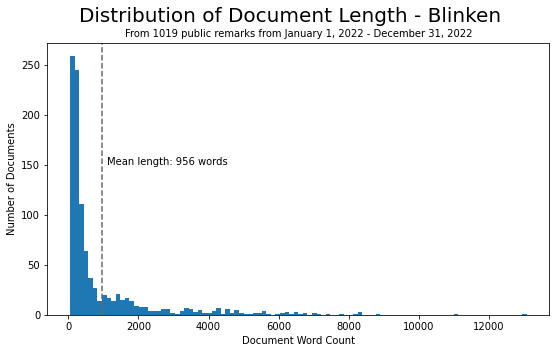

In [7]:
# see what the range of document length is 
fig, ax = plt.subplots(figsize=(9,5))
plt.hist(blinken_2022.content_length, bins = 100)
ax.text(1100, 150, 'Mean length: 956 words')
plt.axvline(x = 956, color = 'dimgrey',ls = 'dashed')
plt.title('From 1019 public remarks from January 1, 2022 - December 31, 2022', size = 10)
plt.suptitle('Distribution of Document Length - Blinken', size = 20)
plt.xlabel('Document Word Count')
plt.ylabel('Number of Documents')
#fig.savefig('blinken2022_hist.png')